# Exploratory Data Analysis of Advance House Price Prediction Dataset

# All lifecycles in a Data Science Project

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [3]:
# IMPORTING ALL THE MAJOR LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# JUST TO SEE THE VISUALIZATION INSIDE THE NOTEBOOK!
%matplotlib inline 

In [4]:
pd.set_option('display.max_columns', None) # FOR DISPLAYING ALL THE COLUMNS

In [5]:
df = pd.read_csv('train.csv') # READING THE FILE
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.shape # SHAPE OF THE DATASET

(1460, 81)

So there are 81 Columns (Features) and 1460 Rows (examples)!!

In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Steps involved in Data Analysis

1. Check Missing Values
2. Check All the Numerical Variables
3. Distribution of Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Check Outliers if any!
7. Relationship between independent and dependent features( X & Y )

# 1. Checking for Missing Values

In [12]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [19]:
missing_value_columns = []
for col in df.columns:
    if df[col].isnull().sum() > 1 :
        missing_value_columns.append(col)
        
for col in missing_value_columns:
    print('{} has Missing Values : {} %'.format(col, np.round(df[col].isnull().mean(), 3)))
    
        

LotFrontage has Missing Values : 0.177 %
Alley has Missing Values : 0.938 %
MasVnrType has Missing Values : 0.005 %
MasVnrArea has Missing Values : 0.005 %
BsmtQual has Missing Values : 0.025 %
BsmtCond has Missing Values : 0.025 %
BsmtExposure has Missing Values : 0.026 %
BsmtFinType1 has Missing Values : 0.025 %
BsmtFinType2 has Missing Values : 0.026 %
FireplaceQu has Missing Values : 0.473 %
GarageType has Missing Values : 0.055 %
GarageYrBlt has Missing Values : 0.055 %
GarageFinish has Missing Values : 0.055 %
GarageQual has Missing Values : 0.055 %
GarageCond has Missing Values : 0.055 %
PoolQC has Missing Values : 0.995 %
Fence has Missing Values : 0.808 %
MiscFeature has Missing Values : 0.963 %


## Finding the relationship between missing values and the Dependent value(Y)

In [35]:
data.groupby('MiscFeature')['SalePrice'].median()

MiscFeature
0    146000
1    164250
Name: SalePrice, dtype: int64

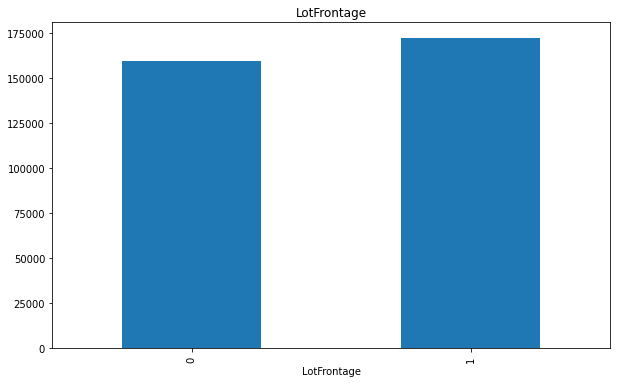

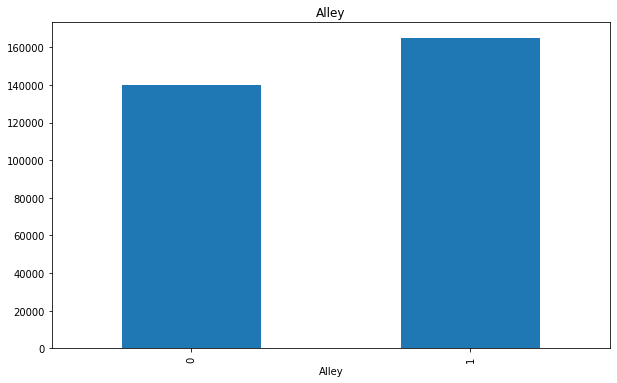

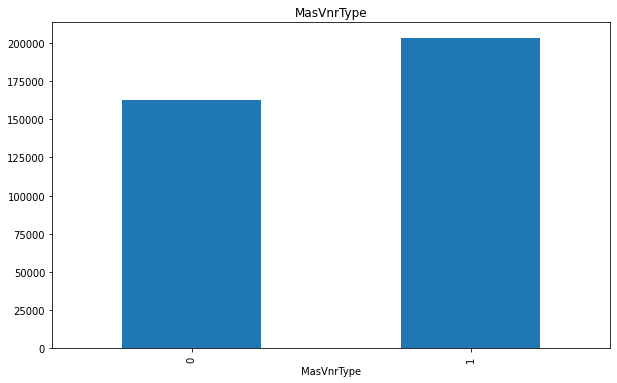

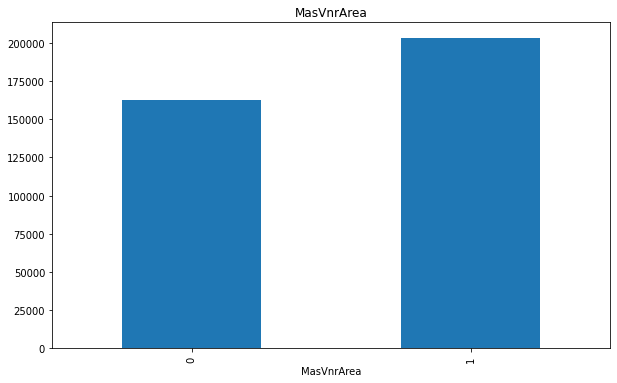

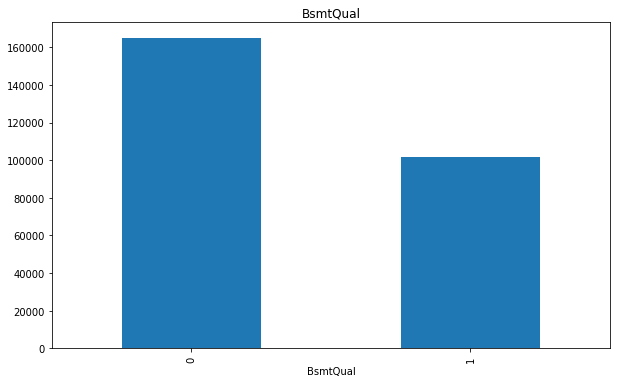

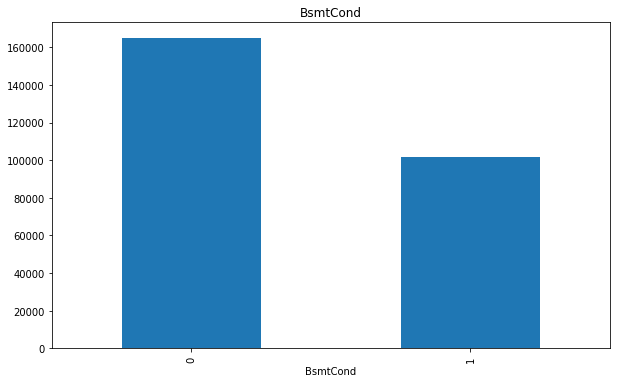

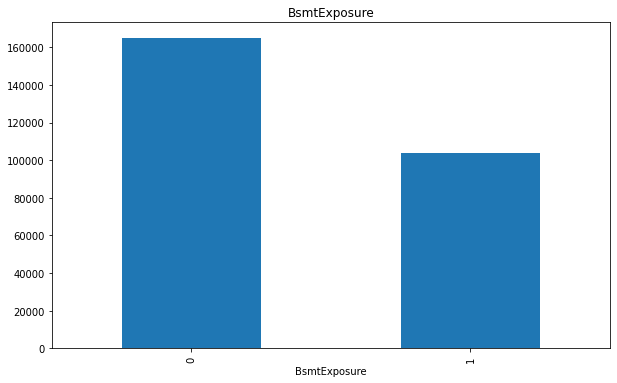

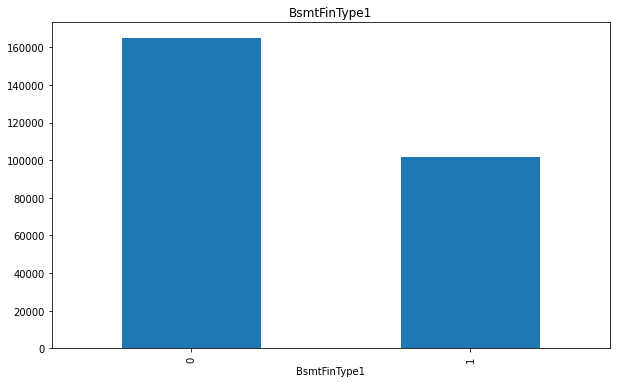

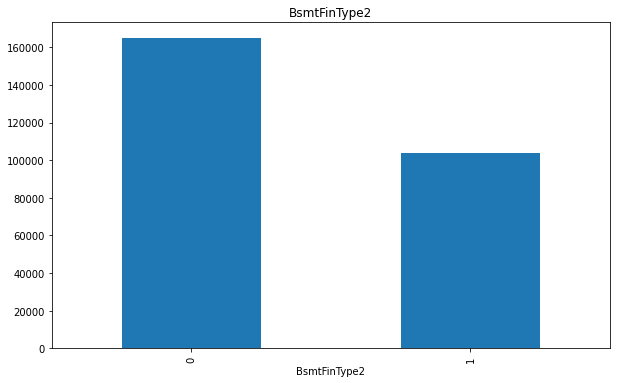

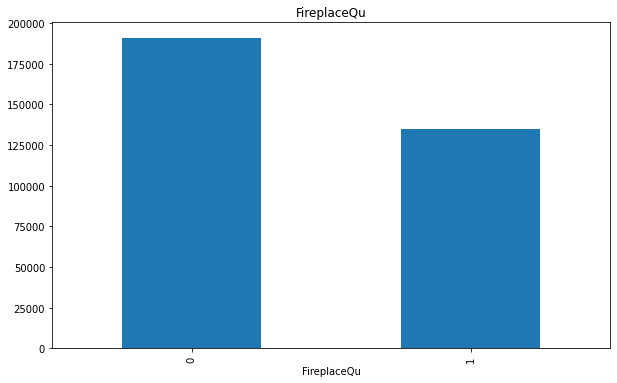

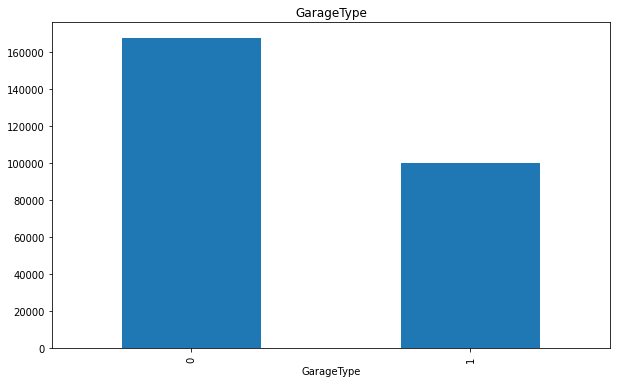

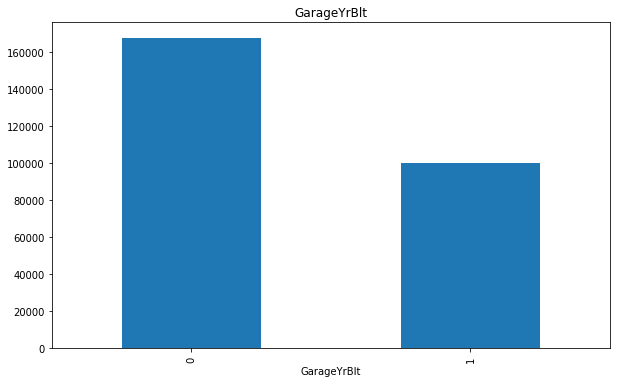

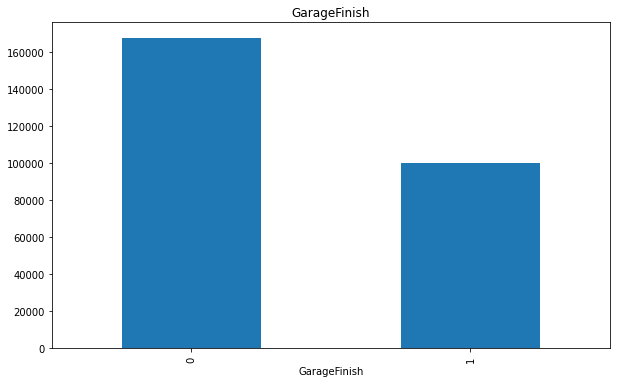

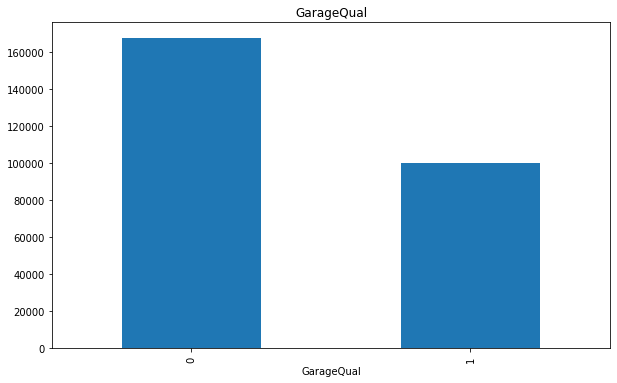

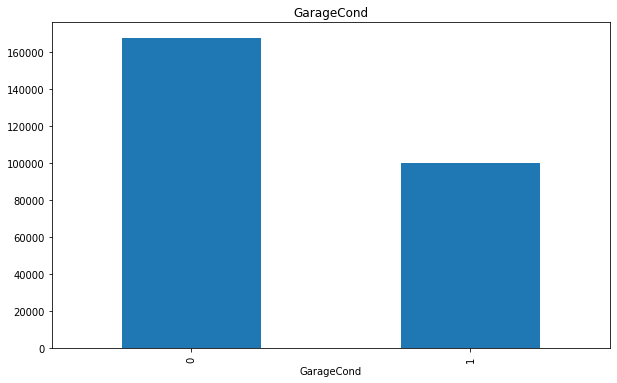

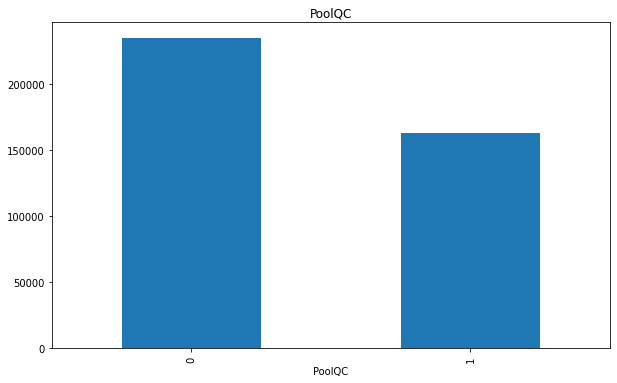

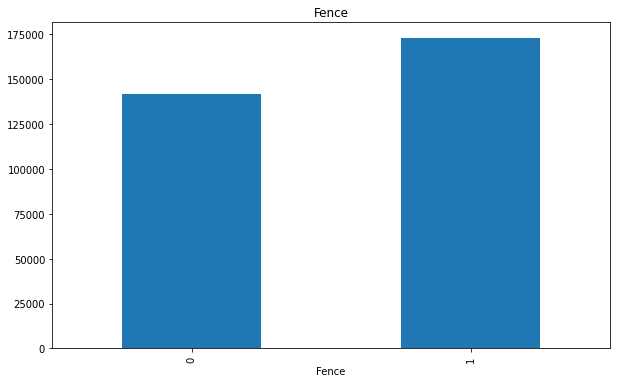

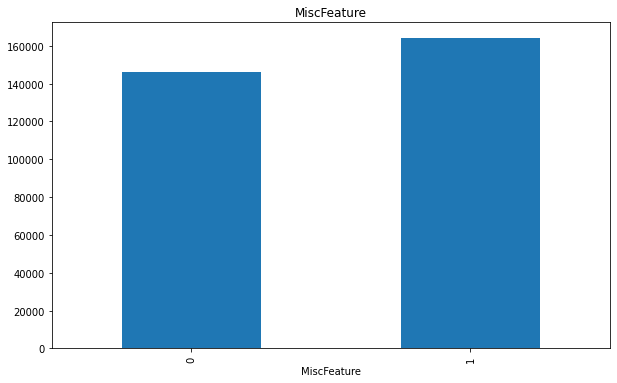

In [36]:
for col in missing_value_columns:
    plt.figure(figsize=(10,6))

    data = df.copy()
    
    data[col] = np.where(data[col].isnull(), 1, 0) # INDICATING MISSING VALUES WITH 1 
    
    data.groupby(col)['SalePrice'].median().plot.bar()
    plt.title(col)
    plt.show()
    
    
# Y -- IS THE SALES PRICE
# X -- IS THE FEATURE

- So as per the above Observation we see that the features which are having the NaN values have a higher impact w.r.t Sales Price feature . hence we need to compute the missing values while doing feature engineering.

# Numerical Variables

In [57]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
# numerical_features
print('The Number of Numerical Features are {}'.format(len(numerical_features)))

The Number of Numerical Features are 38


In [53]:
df.MSZoning.dtype

dtype('O')

## Temporal variables .e.g. - DateTime variable
- First see if there is any Date Time variables or not . because the datetime variables are also very much useful while doing the feature engineering eg. we can find out the age of the year by **year built - current year**

In [58]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [60]:
temporal_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [61]:
df[temporal_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


In [65]:
df['YearBuilt'].unique() # FINDING THE UNIQUE YEARS IN EACH OF THE DATE TIME FEATURES

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [66]:
df['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1904     1
1898     1
1893     1
1882     1
2010     1
Name: YearBuilt, Length: 112, dtype: int64

### Check whether there is a relation between YrSold and the output variable SalePrice

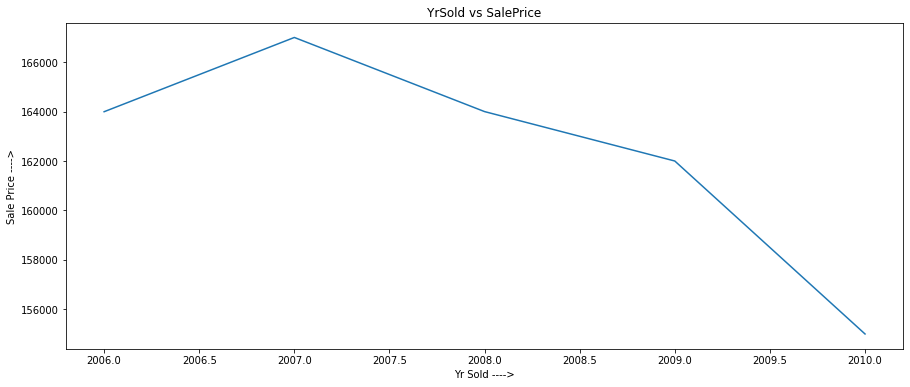

In [78]:
plt.figure(figsize=(15,6))
df.groupby('YrSold')['SalePrice'].median().plot() # GROUPING BY "YrSold" THEN TAKING MEDIAN OF EACH GROUP
plt.title('YrSold vs SalePrice')
plt.xlabel('Yr Sold ---->')
plt.ylabel('Sale Price ---->')
plt.show()

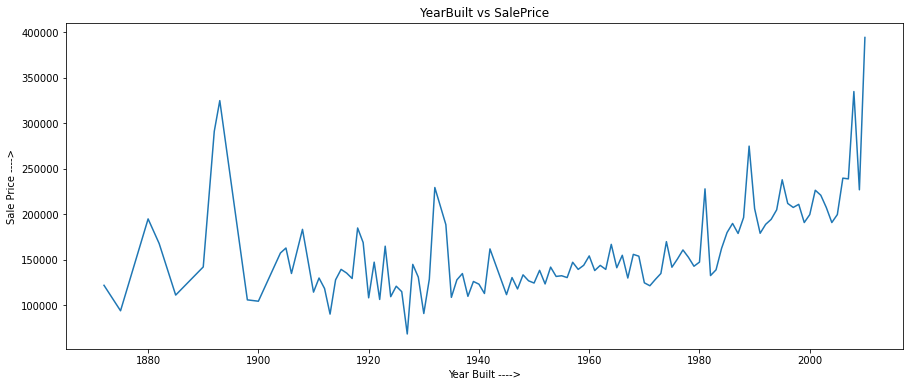

In [83]:
plt.figure(figsize=(15,6))
df.groupby('YearBuilt')['SalePrice'].median().plot() # GROUPING BY "YrSold" THEN TAKING MEDIAN OF EACH GROUP
plt.title('YearBuilt vs SalePrice')
plt.xlabel('Year Built ---->')
plt.ylabel('Sale Price ---->')
plt.show()

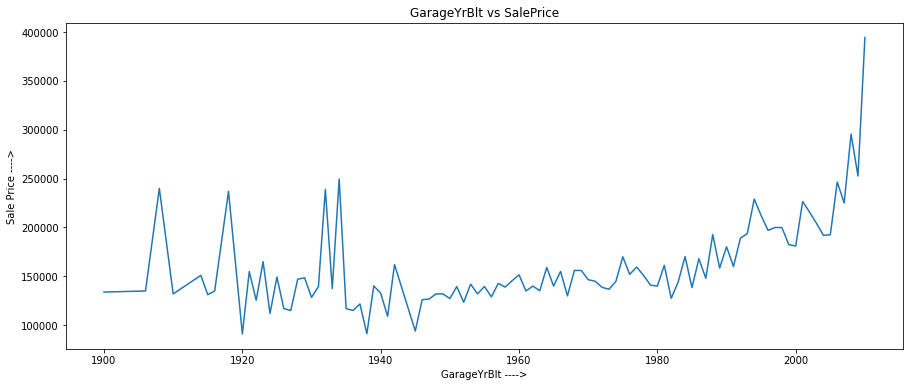

In [84]:
plt.figure(figsize=(15,6))
df.groupby('GarageYrBlt')['SalePrice'].median().plot() # GROUPING BY "YrSold" THEN TAKING MEDIAN OF EACH GROUP
plt.title('GarageYrBlt vs SalePrice')
plt.xlabel('GarageYrBlt ---->')
plt.ylabel('Sale Price ---->')
plt.show()

In [88]:
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

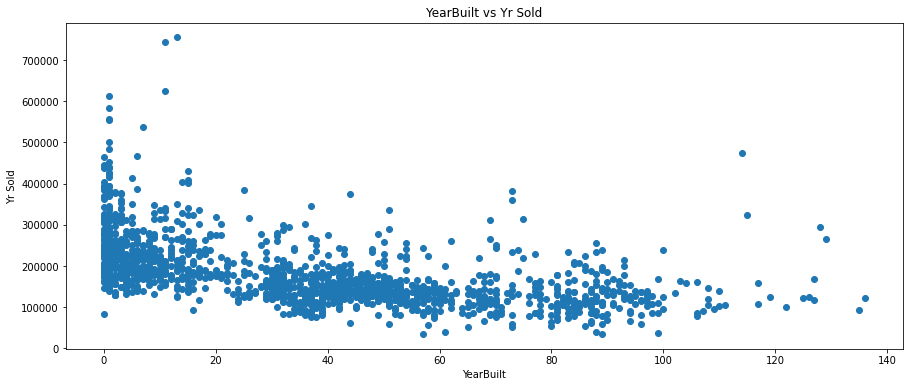

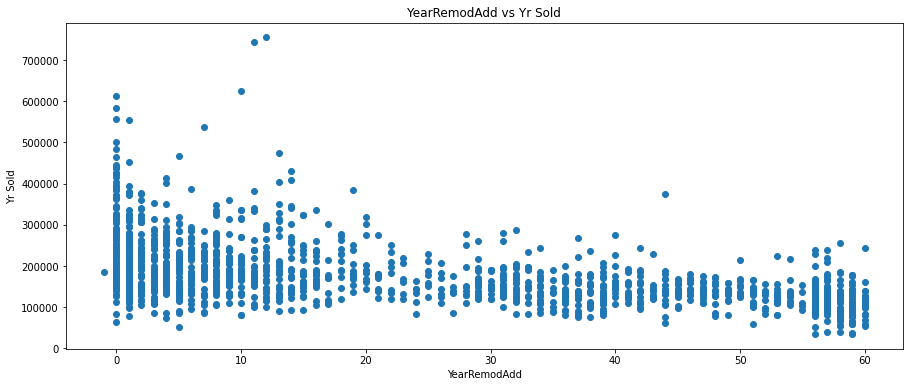

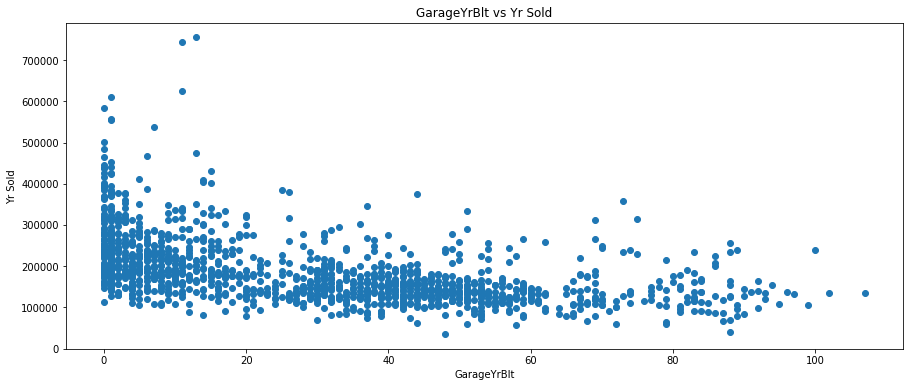

<Figure size 1080x432 with 0 Axes>

In [90]:
for feat in temporal_features:
    
    plt.figure(figsize=(15,6))
    if feat != 'YrSold':
        data = df.copy()
        
        data[feat] = data['YrSold'] - data[feat]
        plt.scatter(data[feat], data['SalePrice'])
        plt.title('{} vs Yr Sold'.format(feat))
        plt.xlabel(feat)
        plt.ylabel('Yr Sold')
        plt.show()

**Numerical features are of 2 types :**

1. **Discrete Features**
2. **Continous Features**

In [99]:
discrete_features = [feat for feat in numerical_features if df[feat].nunique() < 25 and feat not in temporal_features + ['Id']]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [101]:
len(discrete_features)

17

In [102]:
df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


### Visualizing the SalesPrice with the discrete_features

<AxesSubplot:xlabel='MSSubClass'>

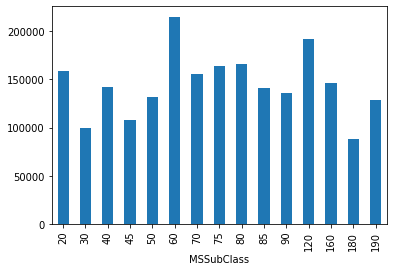

In [107]:
data.groupby('MSSubClass')['SalePrice'].median().plot.bar()

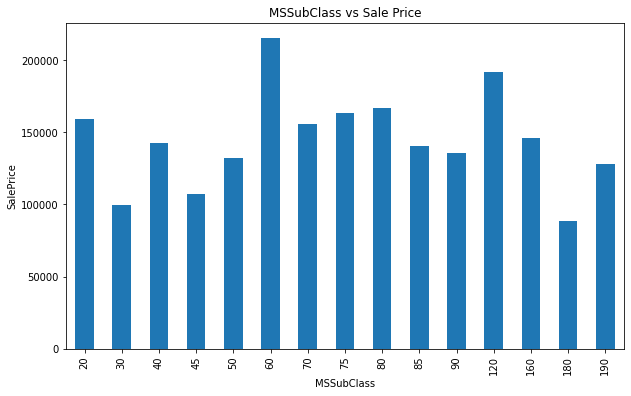

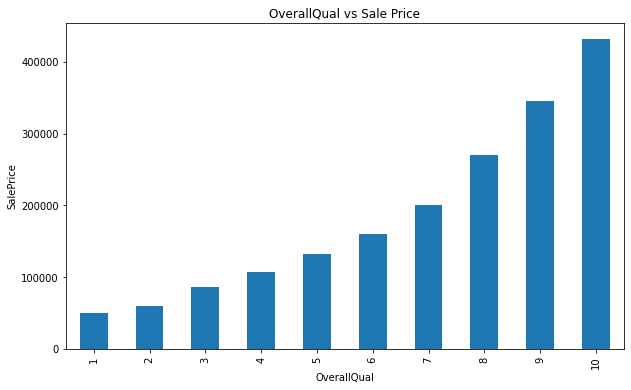

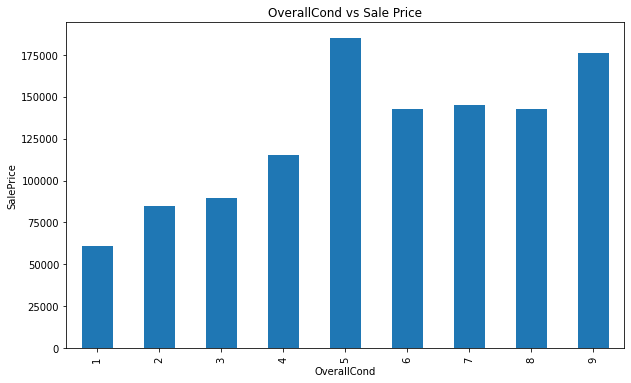

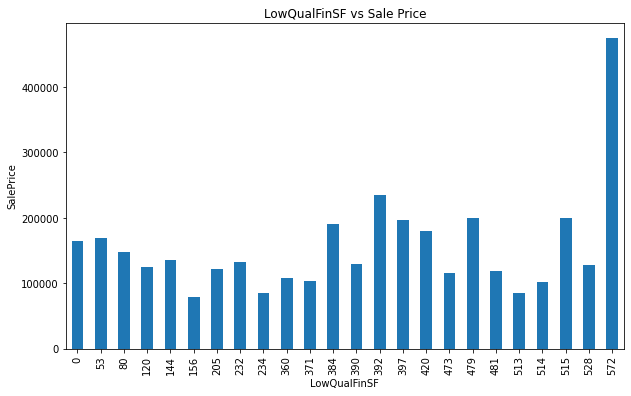

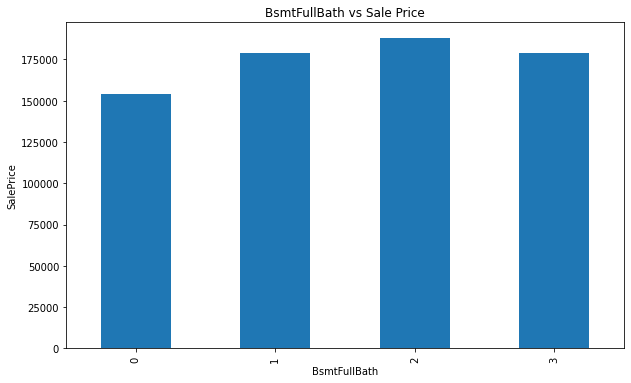

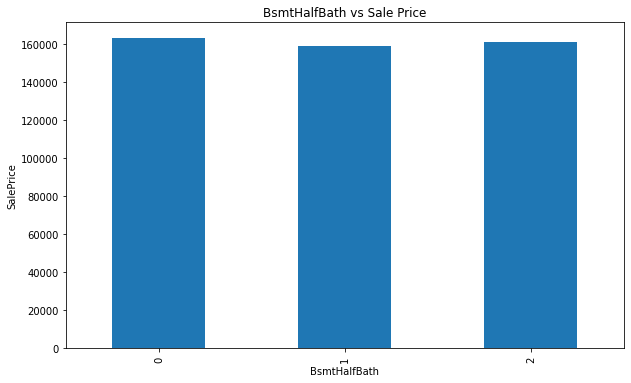

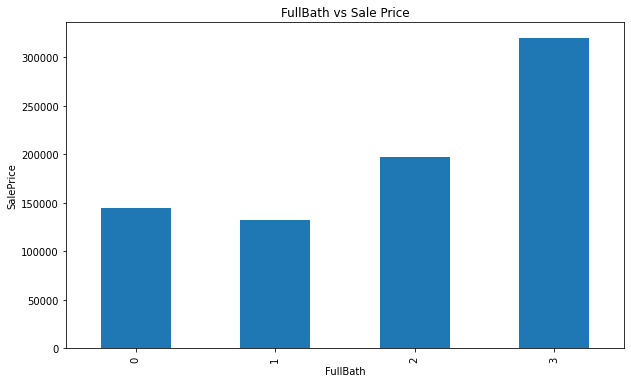

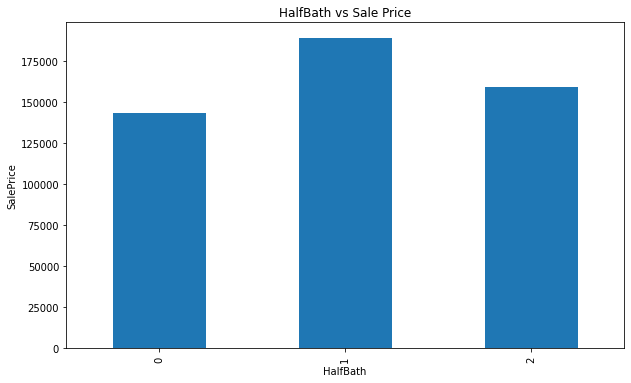

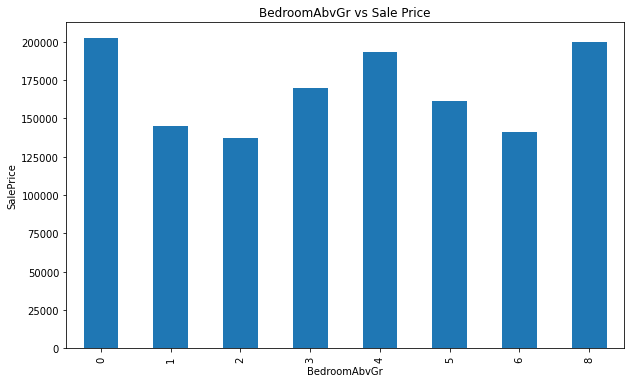

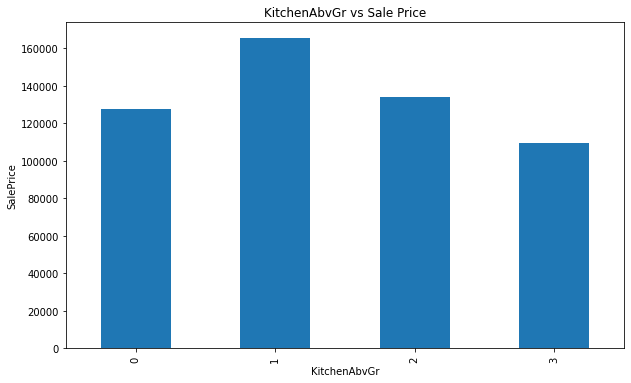

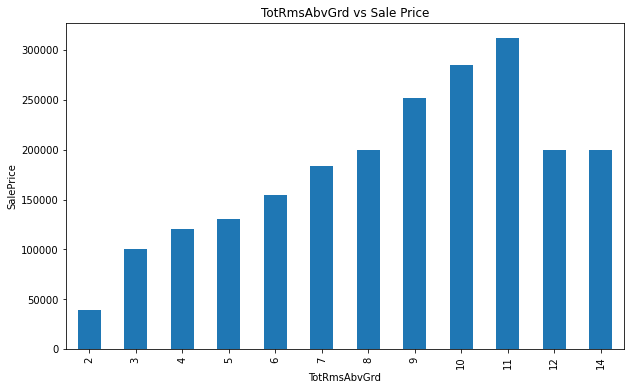

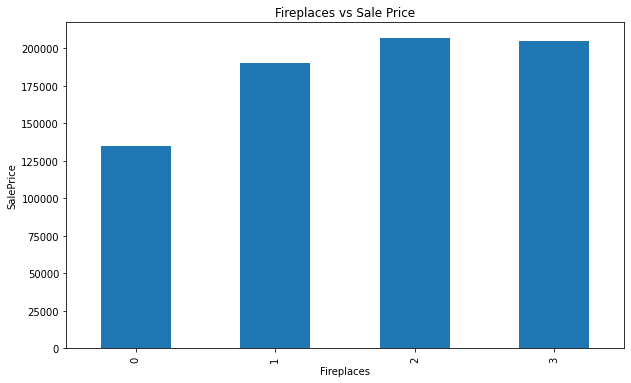

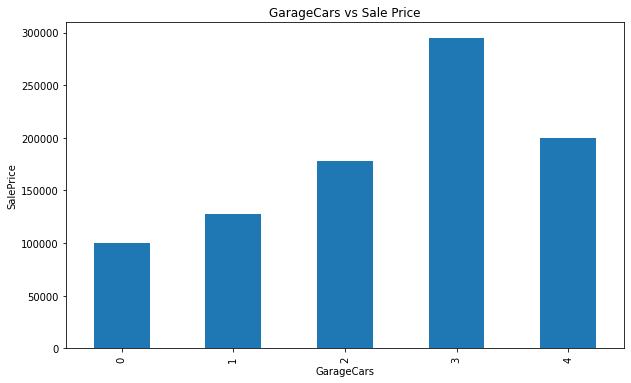

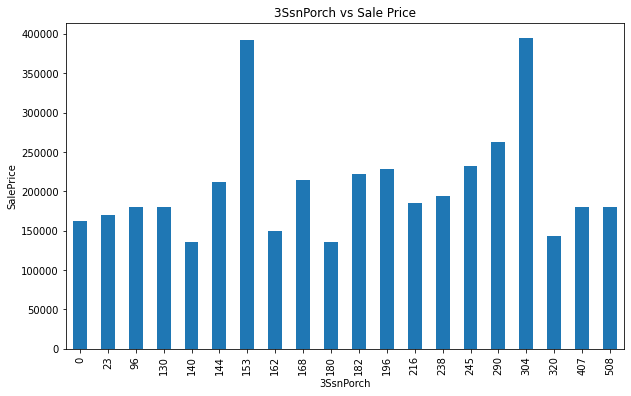

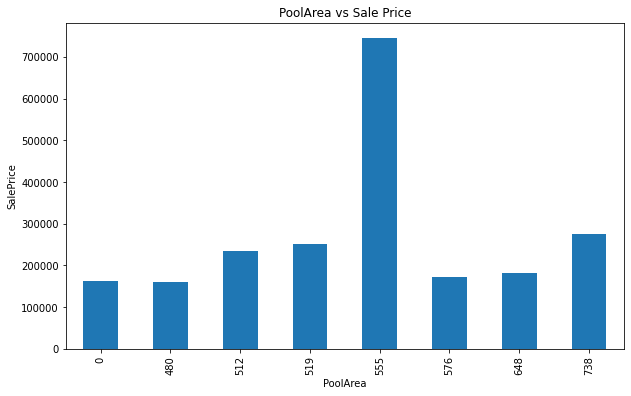

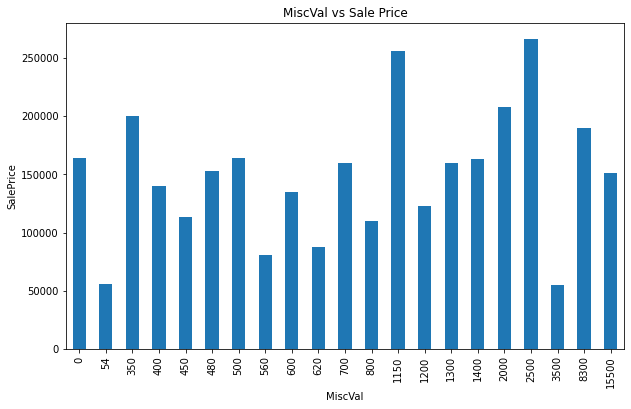

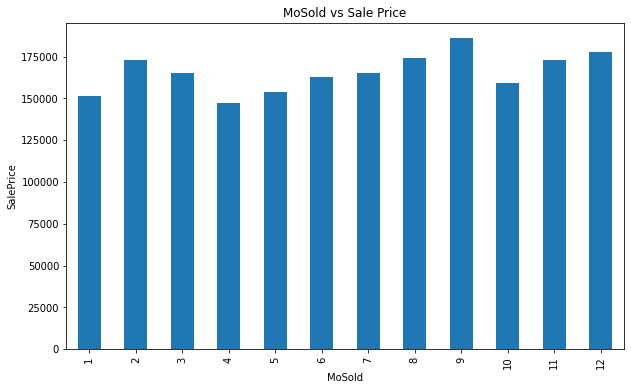

In [119]:
for feat in discrete_features:
    plt.figure(figsize=(10,6))
    data = df.copy()
    data.groupby(feat)['SalePrice'].median().plot.bar()
    plt.title('{} vs Sale Price'.format(feat))
    plt.xlabel(feat)
    plt.ylabel('SalePrice')
    plt.show()
    
    

## Continous Features

- **NOTE: These are the continous values so we need to find out the DISTRIBUTION of the continous values!!!**
- So that if any feature is not having the normal gaussian distribution then we will convert them into log normal in feature engg.

In [120]:
continous_features = [feat for feat in numerical_features if feat not in discrete_features + temporal_features + ['Id']]
continous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [122]:
len(continous_features)

16

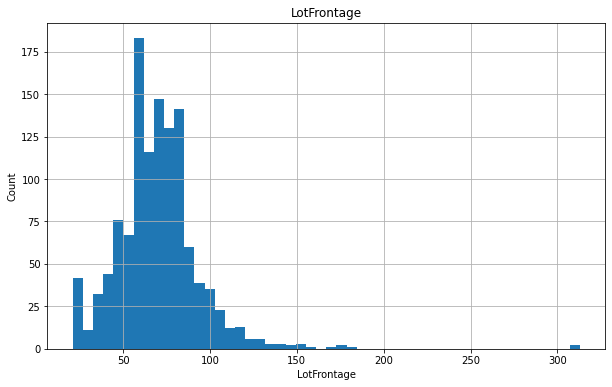

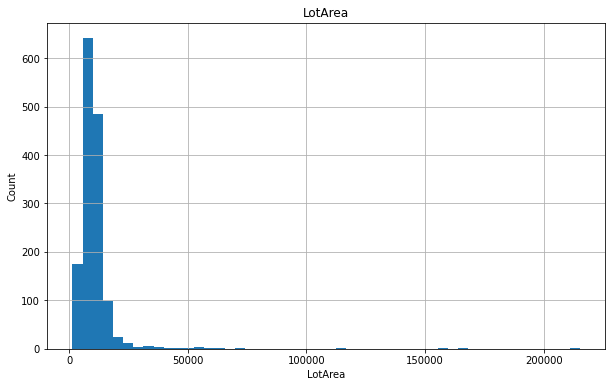

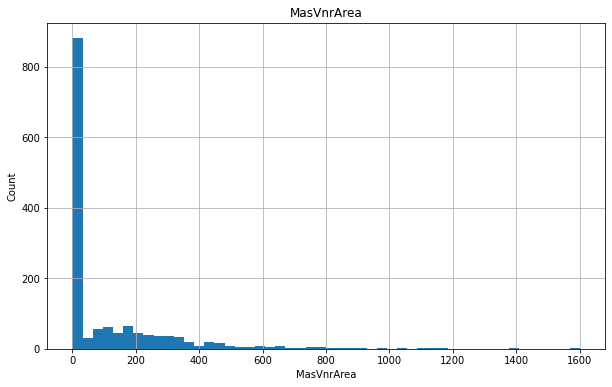

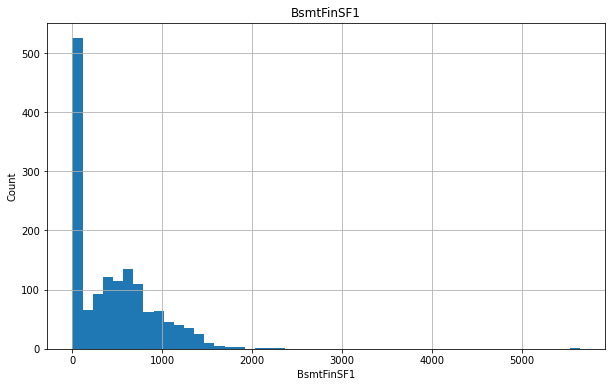

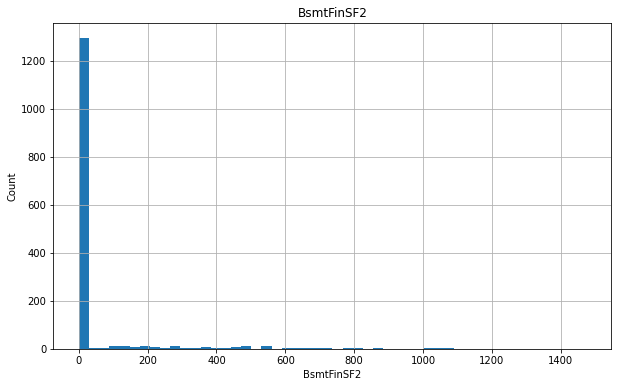

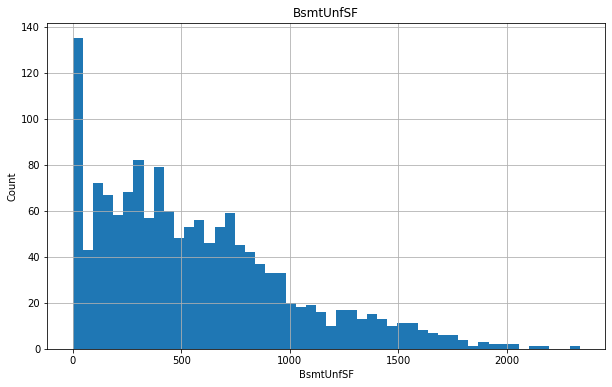

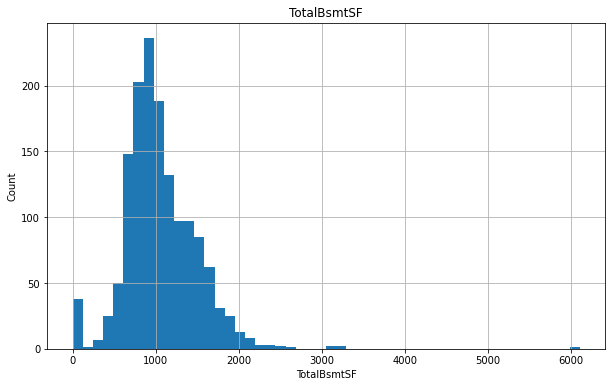

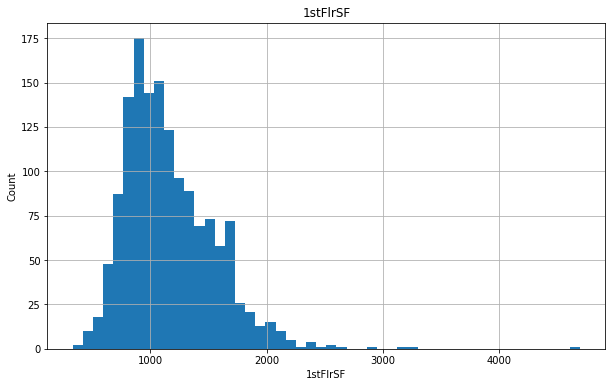

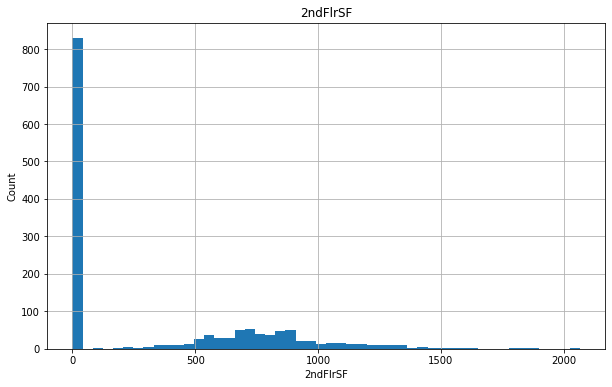

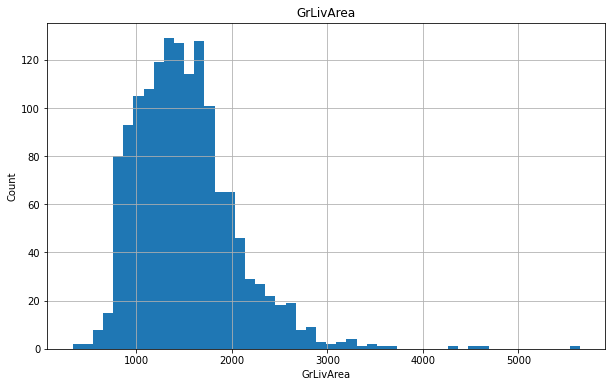

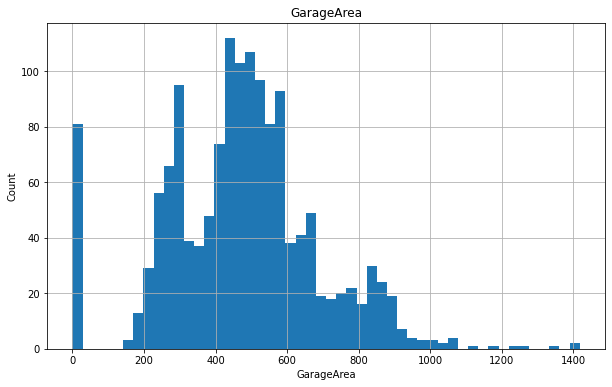

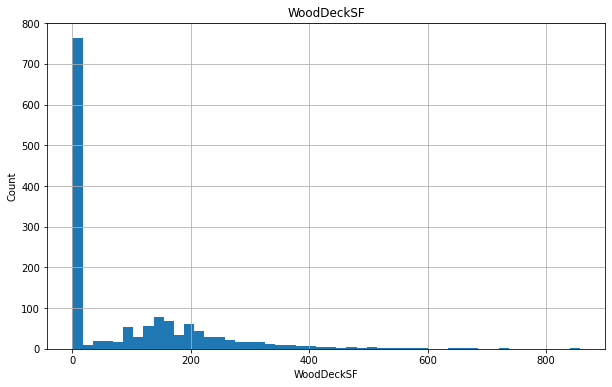

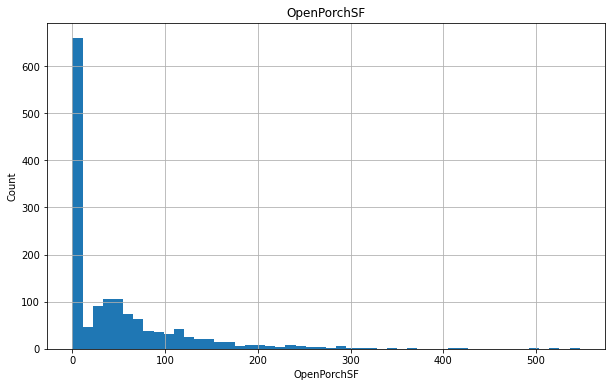

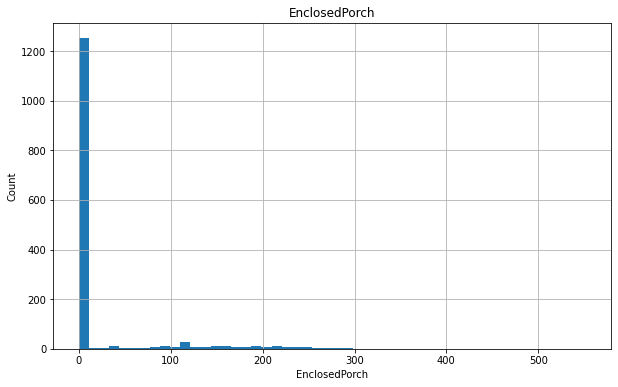

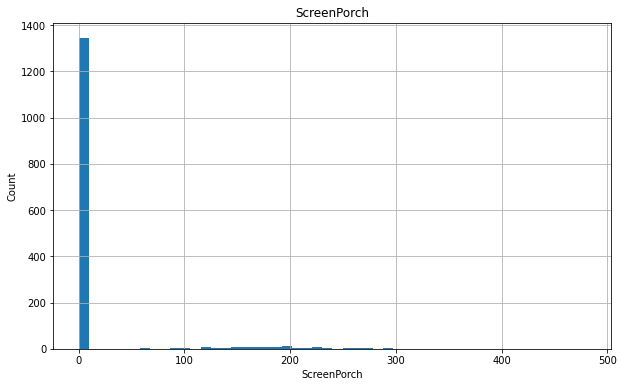

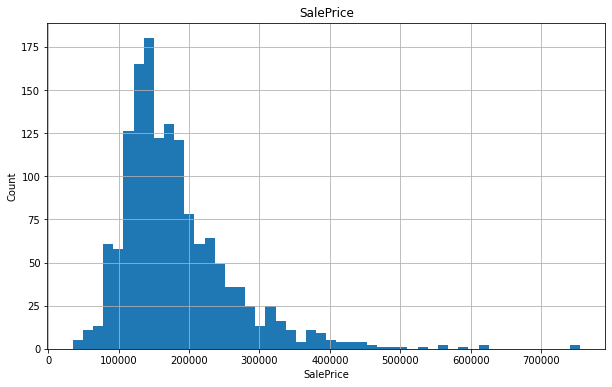

In [127]:
for feat in continous_features:
    plt.figure(figsize=(10,6))
    data = df.copy()
    data[feat].hist(bins=50)
    plt.title(feat)
    plt.xlabel(feat)
    plt.ylabel('Count')
    plt.show()

# EDA - 2

## Log transform all the continous features

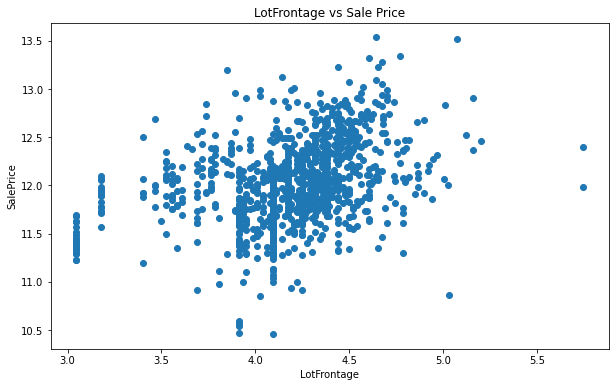

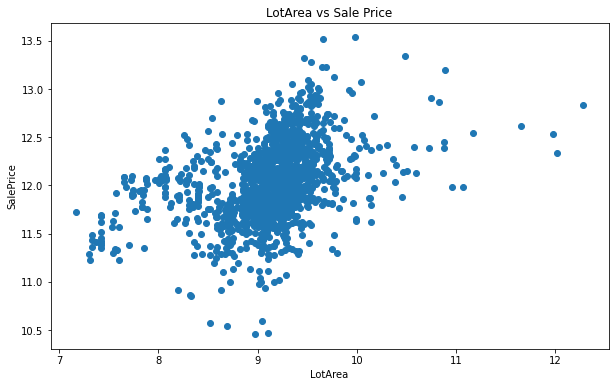

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

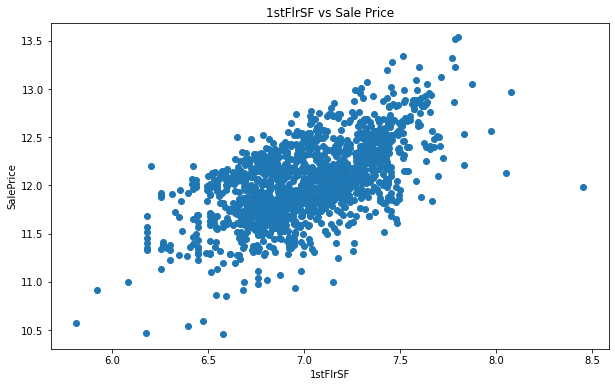

<Figure size 720x432 with 0 Axes>

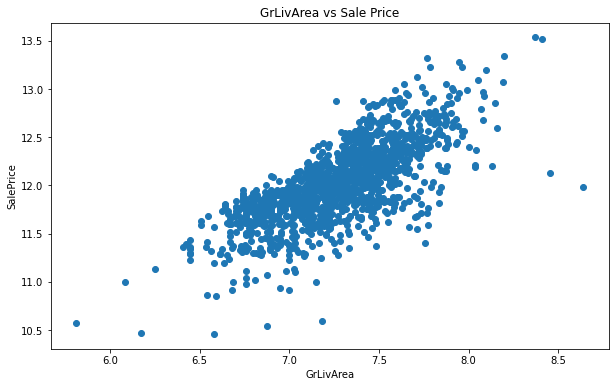

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

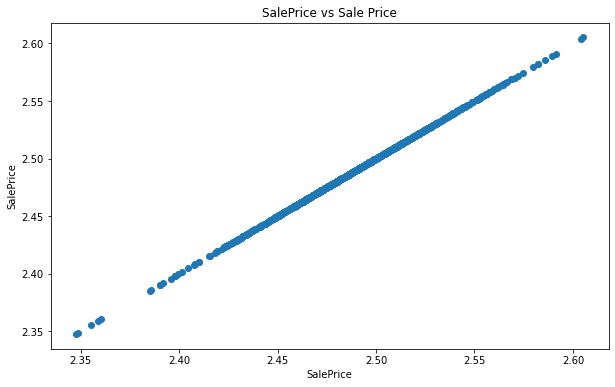

In [131]:
for feat in continous_features:
    data = df.copy()
    plt.figure(figsize=(10,6))
    if 0 not in data[feat].unique():
        data[feat] = np.log(data[feat])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feat], data['SalePrice'])
        plt.title('{} vs Sale Price'.format(feat))
        plt.xlabel(feat)
        plt.ylabel('SalePrice')
        plt.show()
        
        

# Outliers

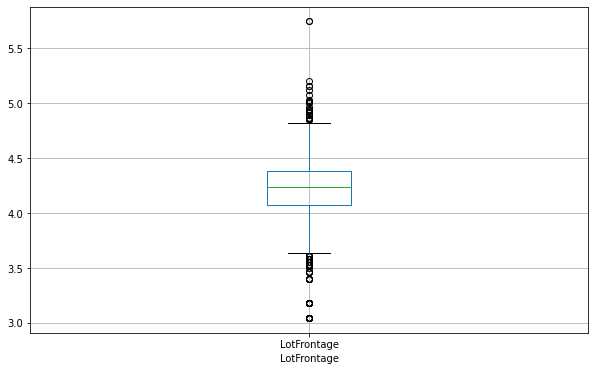

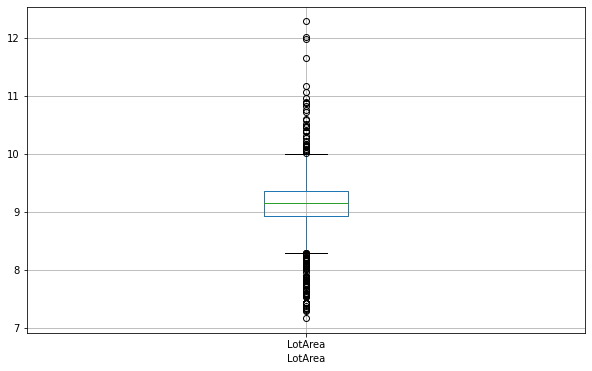

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

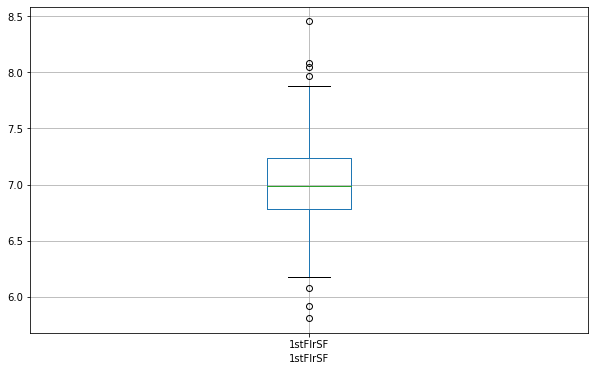

<Figure size 720x432 with 0 Axes>

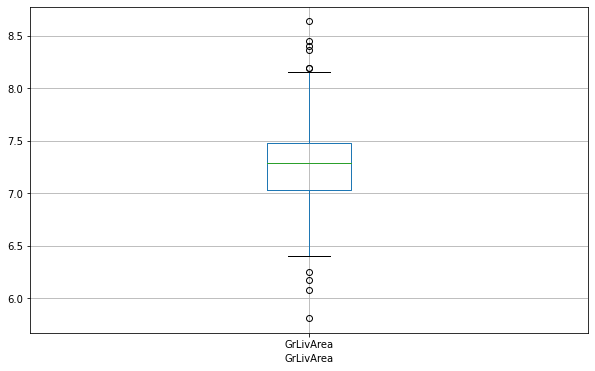

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

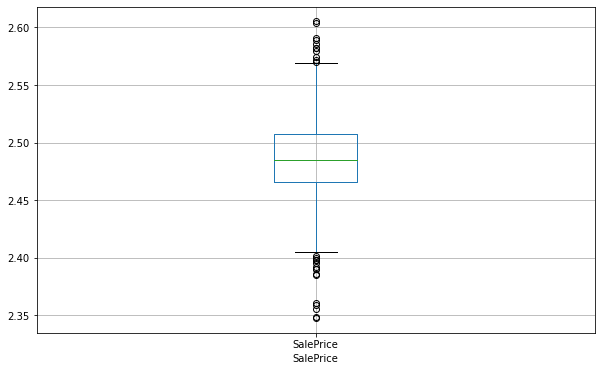

In [136]:
# BOX PLOT to find the outliers 
# NOTE : only works for numerical variables and NOT for Categorical features

for feat in continous_features:
    data = df.copy()
    plt.figure(figsize=(10,6))
    if 0 not in data[feat].unique():
        data[feat] = np.log(data[feat])
        data['SalePrice'] = np.log(data['SalePrice'])
        data.boxplot(column=feat)
        plt.xlabel(feat)
        plt.show()

# Categorical Features

In [140]:
categorical_features = [feat for feat in df.columns if df[feat].dtypes == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [141]:
len(categorical_features)

43

In [142]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### First focus on the cardinality of the categorical features.... so that then you will be able to interpret how to impute the missing values

In [144]:
for feat in categorical_features:
    print('The feature is {} and No. of categories are {}'.format(feat, df[feat].nunique()))

The feature is MSZoning and No. of categories are 5
The feature is Street and No. of categories are 2
The feature is Alley and No. of categories are 2
The feature is LotShape and No. of categories are 4
The feature is LandContour and No. of categories are 4
The feature is Utilities and No. of categories are 2
The feature is LotConfig and No. of categories are 5
The feature is LandSlope and No. of categories are 3
The feature is Neighborhood and No. of categories are 25
The feature is Condition1 and No. of categories are 9
The feature is Condition2 and No. of categories are 8
The feature is BldgType and No. of categories are 5
The feature is HouseStyle and No. of categories are 8
The feature is RoofStyle and No. of categories are 6
The feature is RoofMatl and No. of categories are 8
The feature is Exterior1st and No. of categories are 15
The feature is Exterior2nd and No. of categories are 16
The feature is MasVnrType and No. of categories are 4
The feature is ExterQual and No. of categ

# Relationship between the categorical features and the SalePrice

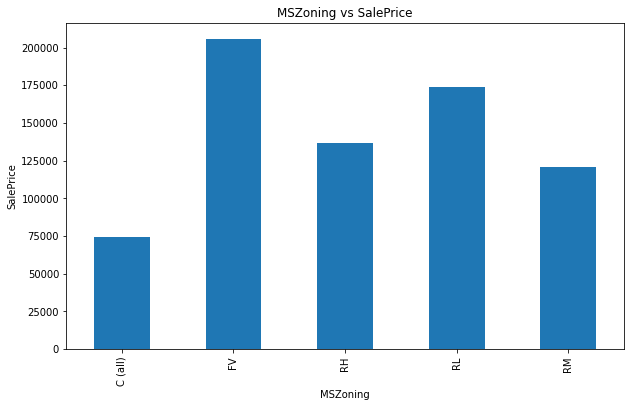

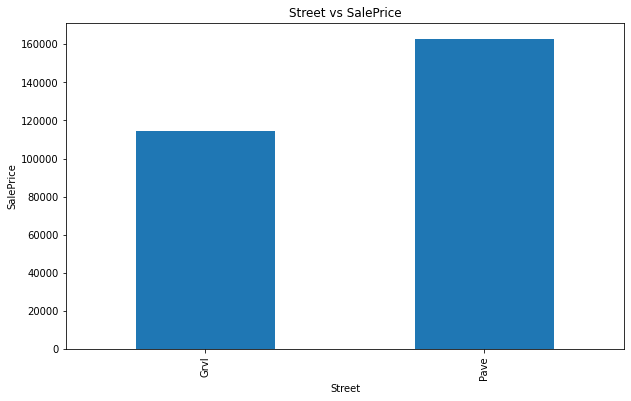

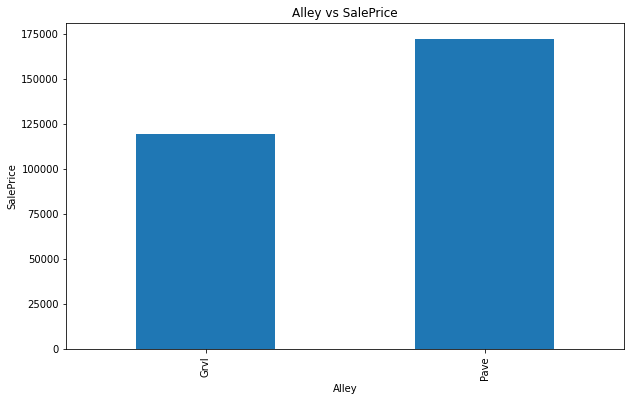

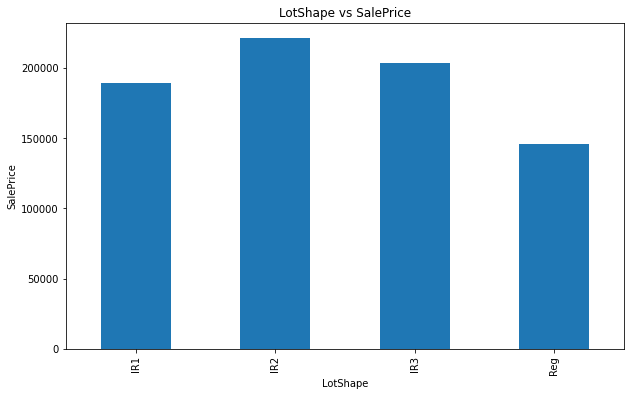

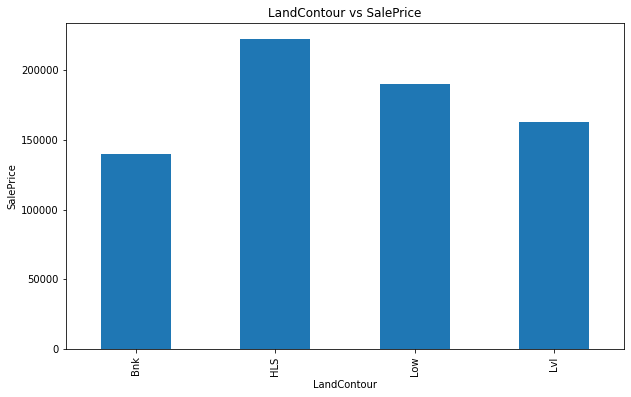

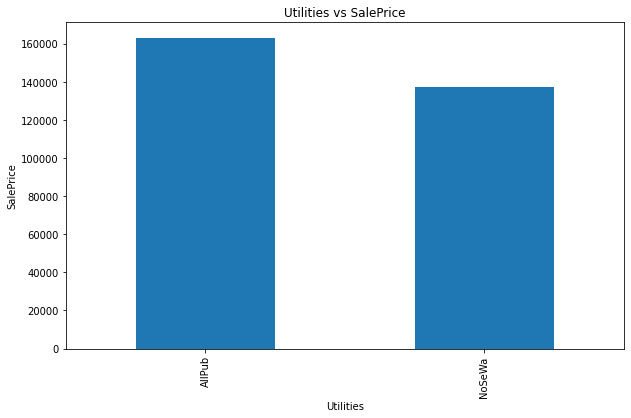

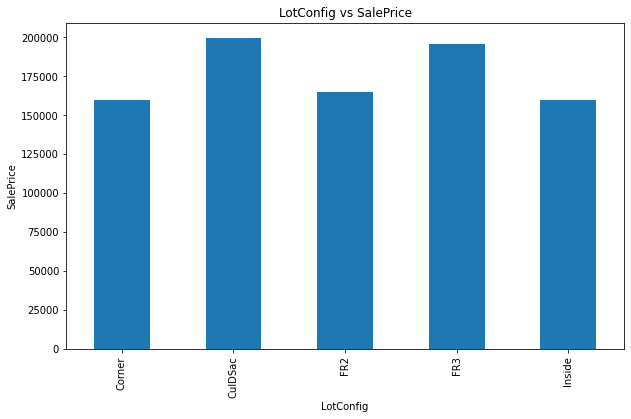

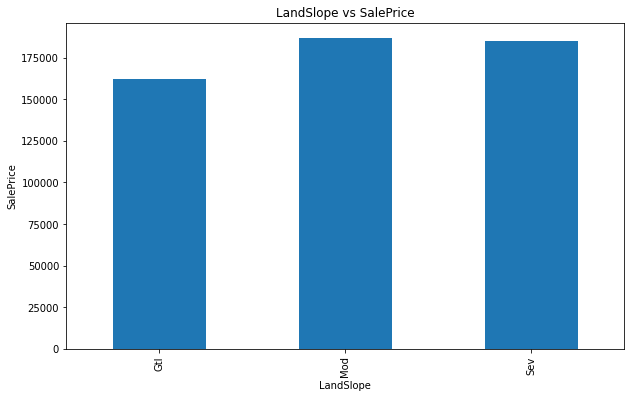

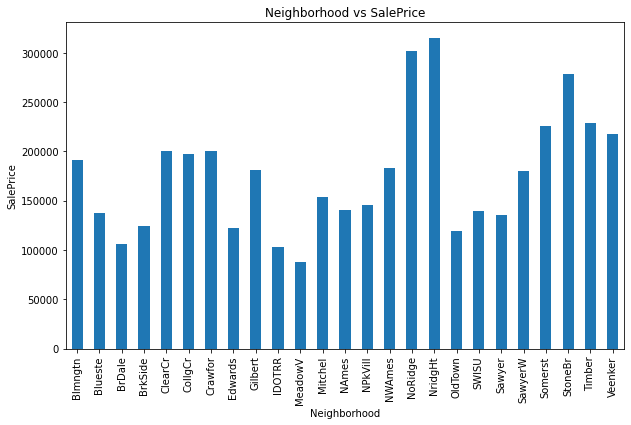

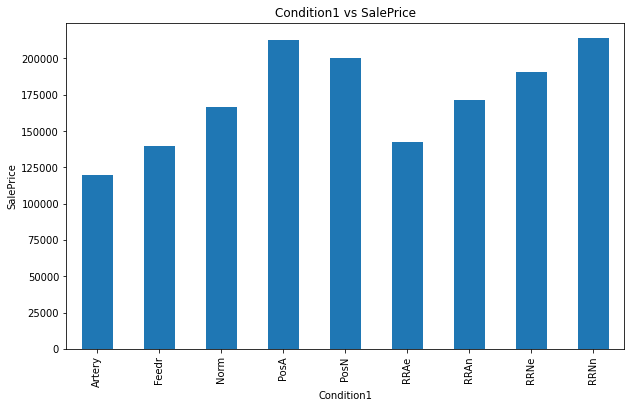

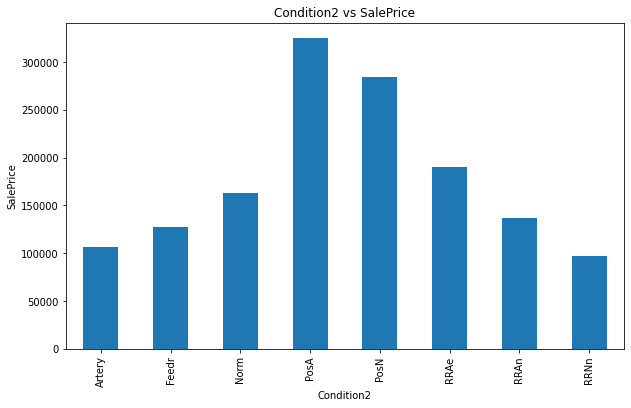

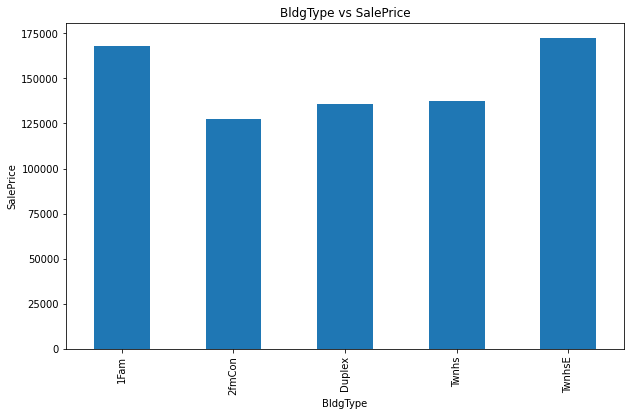

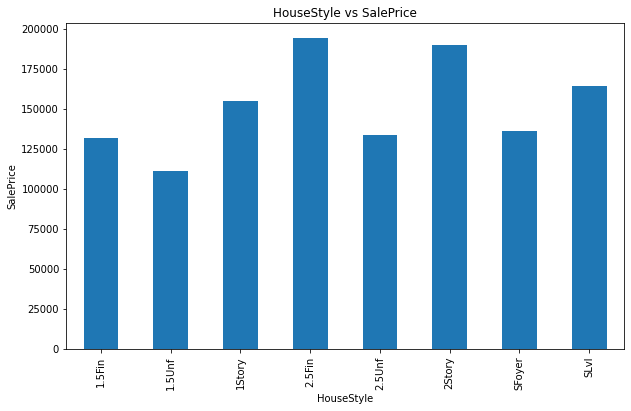

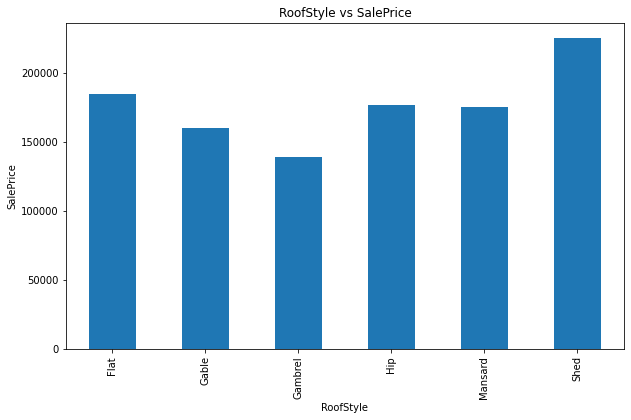

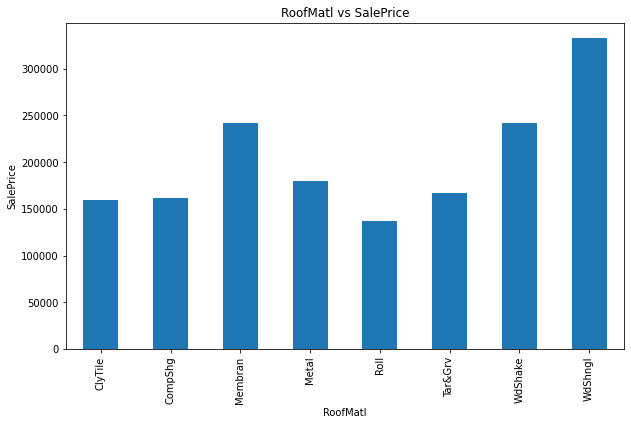

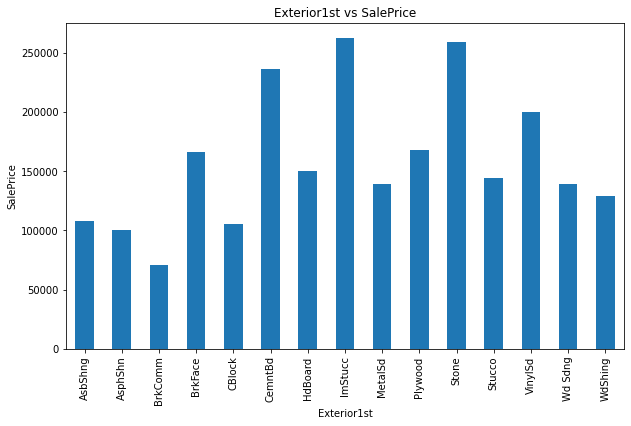

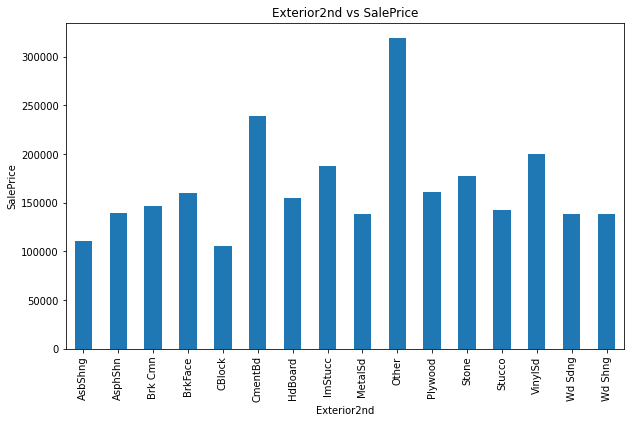

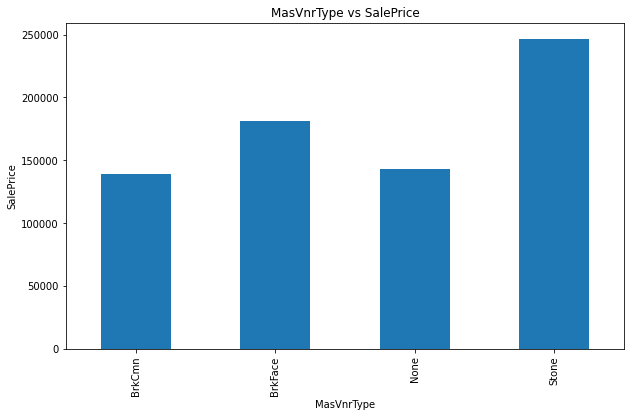

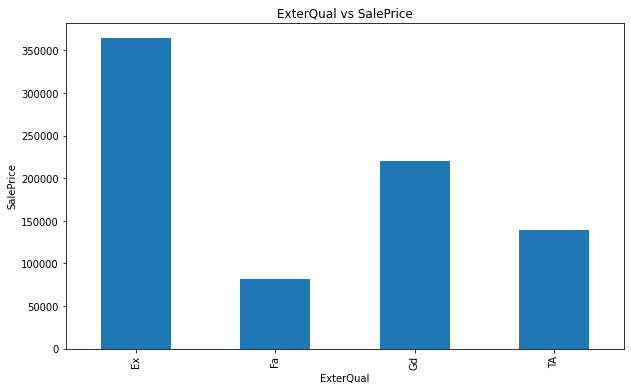

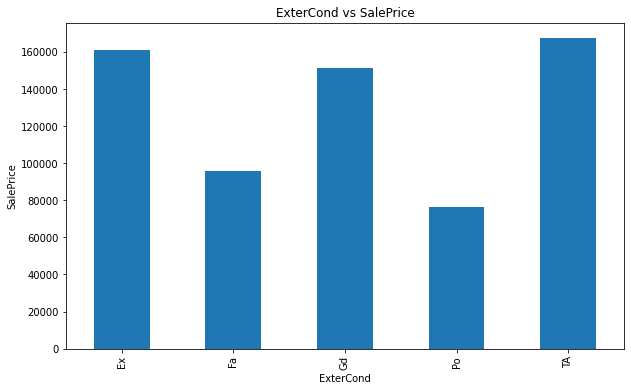

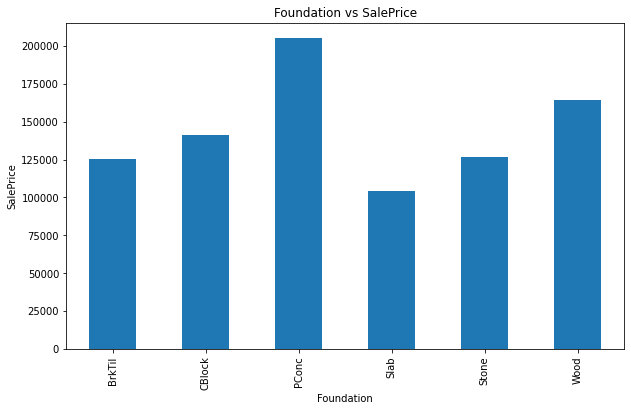

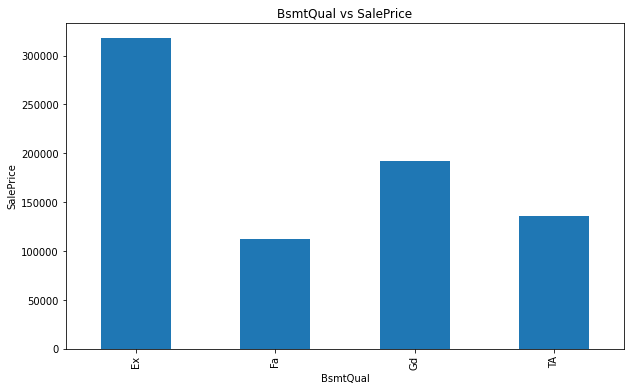

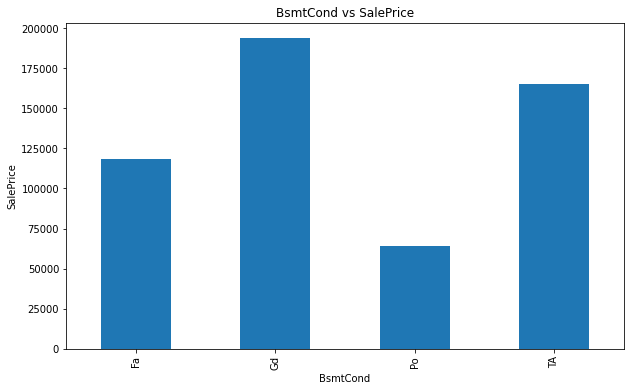

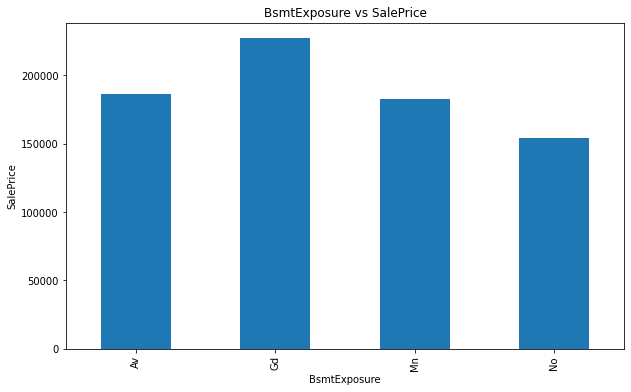

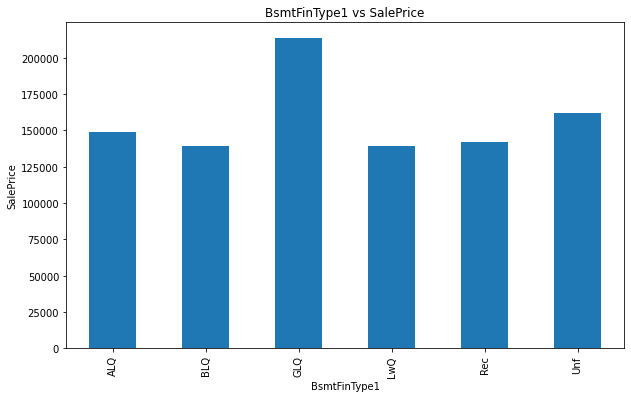

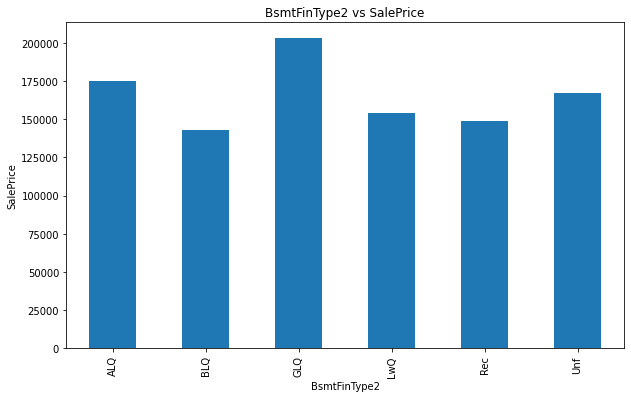

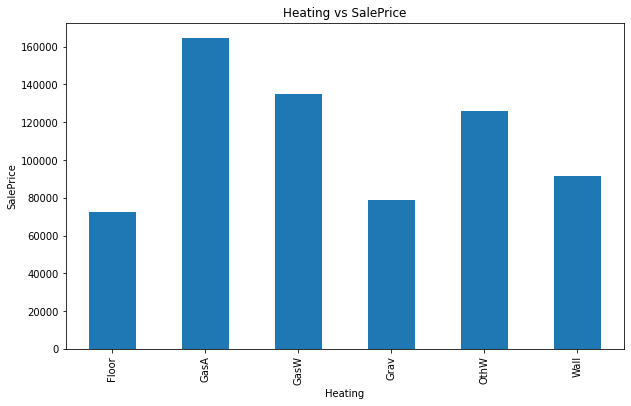

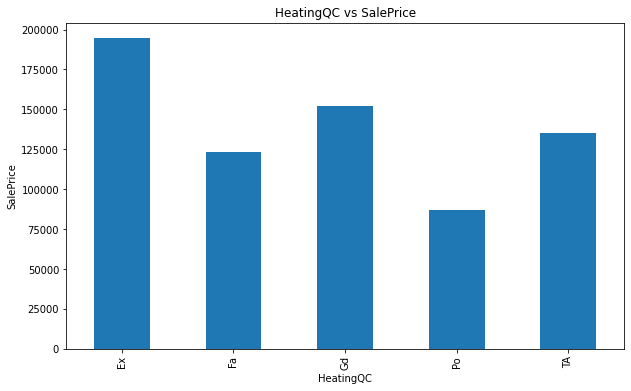

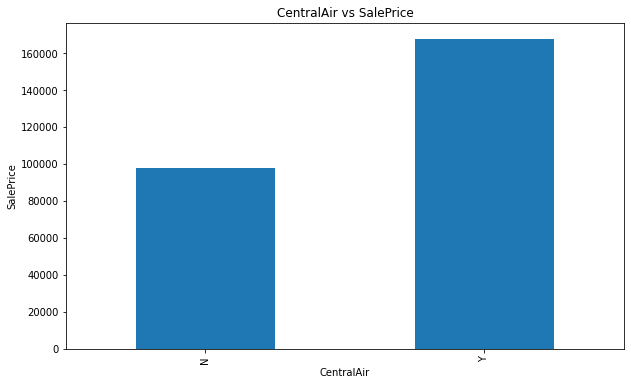

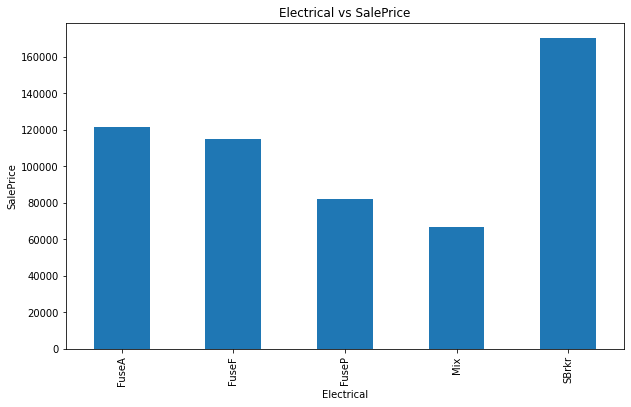

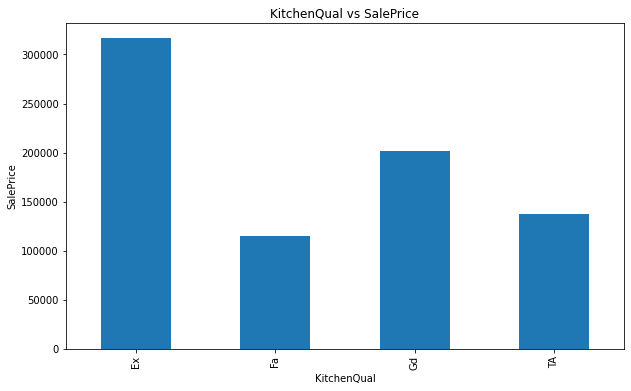

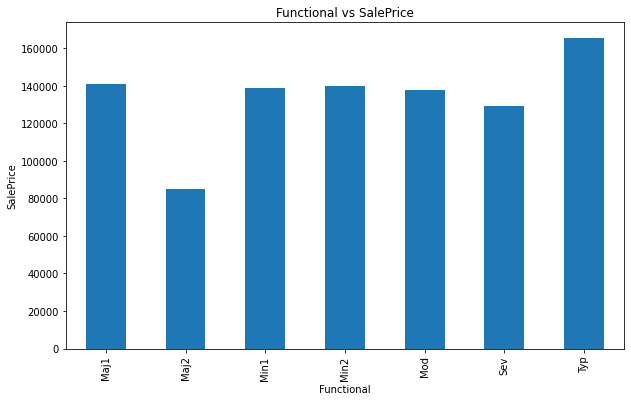

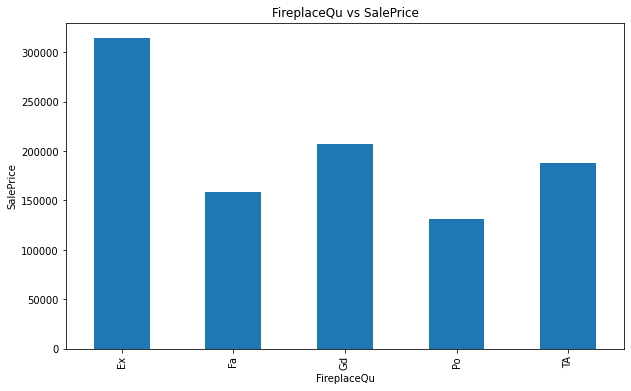

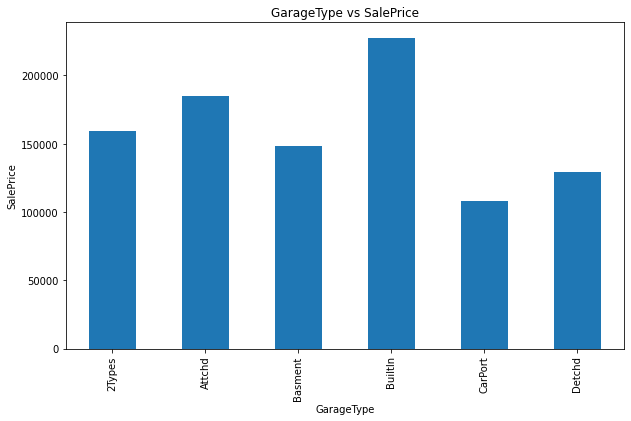

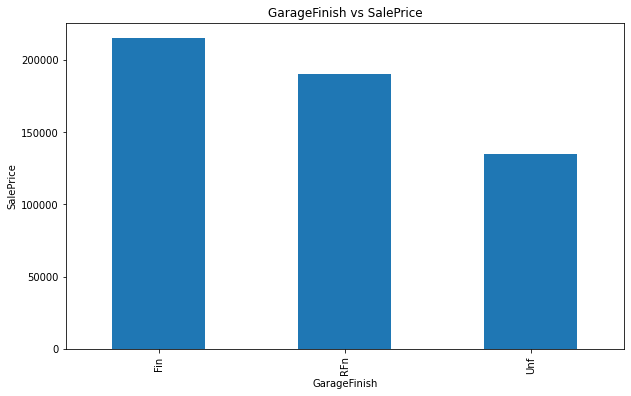

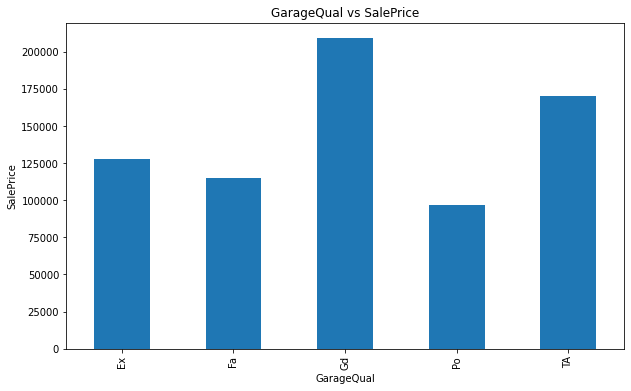

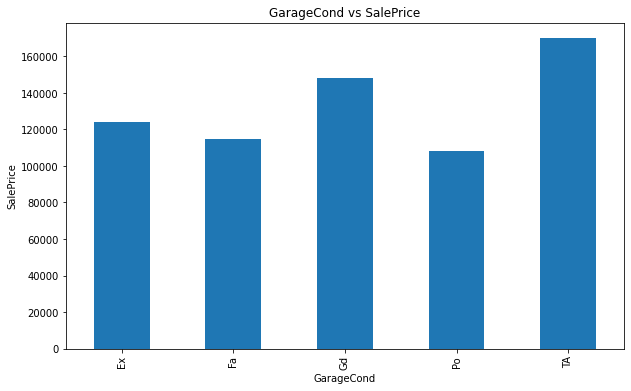

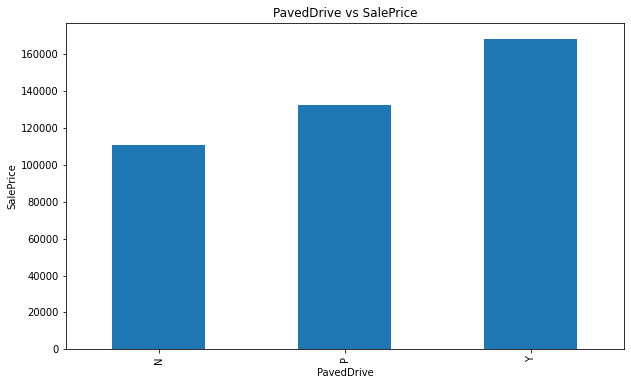

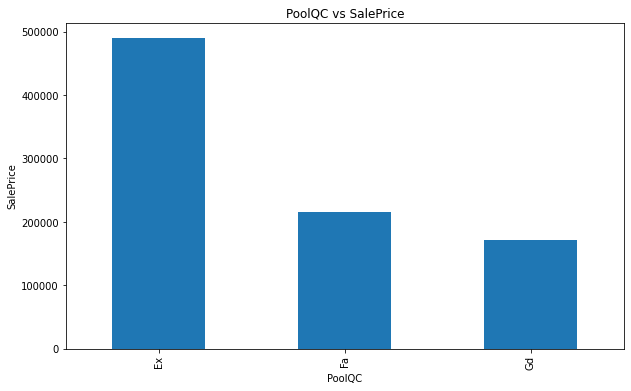

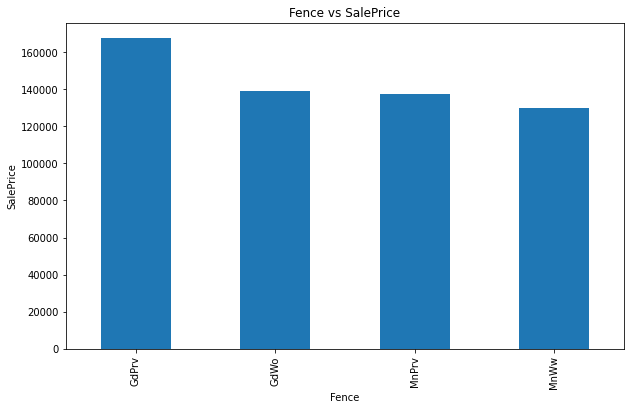

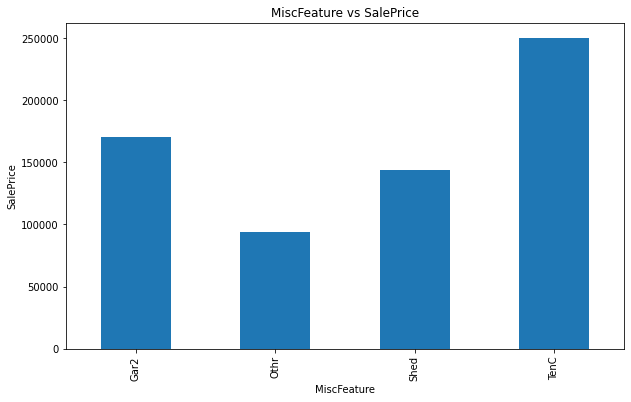

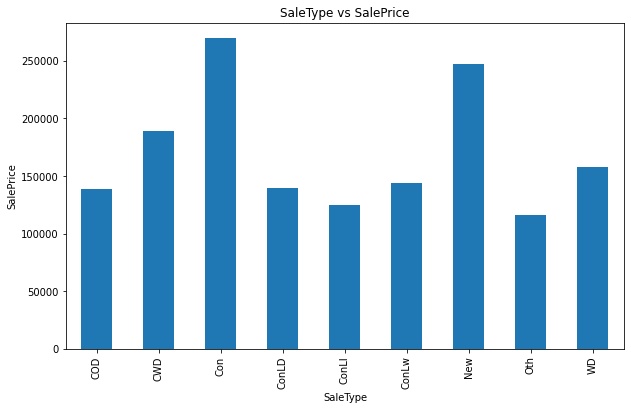

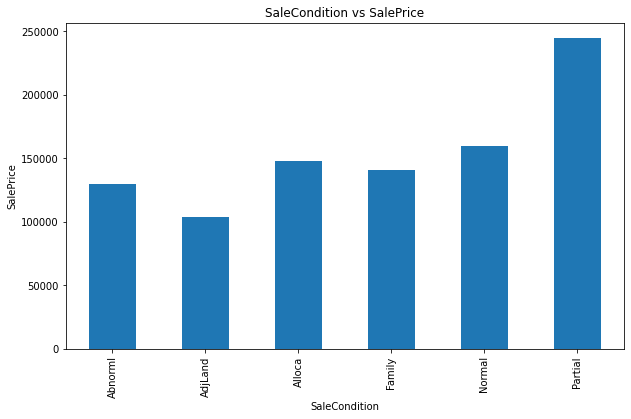

In [146]:
for feat in categorical_features:
    data = df.copy()
    plt.figure(figsize=(10,6))
    data.groupby(feat)['SalePrice'].median().plot.bar()
    plt.xlabel(feat)
    plt.ylabel('SalePrice')
    plt.title('{} vs SalePrice'.format(feat))
    plt.show()

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['SalePrice'], test_size=0.1, random_state=97)

In [151]:
X_train.shape, X_test.shape

((1314, 81), (146, 81))

# Feature Engineering 

### Replacing missing values of CATEGORICAL features with a new Label names "Missing"

In [153]:
cat_features_nan = [feat for feat in df.columns if df[feat].isnull().sum()>1 and df[feat].dtypes=='O']
cat_features_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [157]:
for feat in cat_features_nan:
    print('{} : {} % missing values'.format(feat, np.round(df[feat].isnull().mean(),3)))

Alley : 0.938 % missing values
MasVnrType : 0.005 % missing values
BsmtQual : 0.025 % missing values
BsmtCond : 0.025 % missing values
BsmtExposure : 0.026 % missing values
BsmtFinType1 : 0.025 % missing values
BsmtFinType2 : 0.026 % missing values
FireplaceQu : 0.473 % missing values
GarageType : 0.055 % missing values
GarageFinish : 0.055 % missing values
GarageQual : 0.055 % missing values
GarageCond : 0.055 % missing values
PoolQC : 0.995 % missing values
Fence : 0.808 % missing values
MiscFeature : 0.963 % missing values


In [159]:
def replace_categorical_features(data, features_having_nan):
    datain = data.copy()
    data[features_having_nan] = data[features_having_nan].fillna('Missing')
    return data

dataset = replace_categorical_features(df, cat_features_nan)

In [161]:
dataset[cat_features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [162]:
dataset[cat_features_nan].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,Missing,BrkFace,Gd,TA,No,GLQ,Unf,Missing,Attchd,RFn,TA,TA,Missing,Missing,Missing
1,Missing,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
2,Missing,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
3,Missing,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,Missing,Missing,Missing
4,Missing,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing


### Imputing the missing values of the NUMERICAL  variables

In [166]:
numerical_features_nan = [feat for feat in numerical_features if df[feat].isnull().sum()>1]
numerical_features_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [167]:
for feat in numerical_features_nan:
    print('{} : {} % missing values'.format(feat, np.round(df[feat].isnull().mean(),3)))

LotFrontage : 0.177 % missing values
MasVnrArea : 0.005 % missing values
GarageYrBlt : 0.055 % missing values


## Replacing with median values

In [168]:
for feat in numerical_features_nan:
    median_value = df[feat].median()
    df[feat+'_nan'] = np.where(df[feat].isnull(), 1, 0)
    df[feat].fillna(median_value, inplace=True)
    
df[numerical_features_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [171]:
df.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,

# Dealing with the Temporal variables 

In [174]:
for feat in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[feat] = df['YrSold'] - df[feat]

In [177]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,77.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Missing,Missing,0,4,2008,WD,Abnorml,129900,0,0,0
9,10,190,RL,50.0,7

How to handle skewed dataset?
How to handle Rare Categorical feature?
How to convert Categorical feature into numerical feature?

In [179]:
continous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

# Converting the continous numerical features into normal dist.

In [181]:
num_continous_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feat in num_continous_features:
    df[feat] = np.log(df[feat])

In [182]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


# Handling Rare Categorical Feature

- Remove the categorical variables categories that are present less than 1% of the observations then simply skip that particular category

In [183]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [189]:
for feat in categorical_features:
    temp = df.groupby(feat)['SalePrice'].count()/len(df)
    temp_df = temp[temp>0.1].index
    df[feat] = np.where(df[feat].isin(temp_df), df[feat], 'Rare_var')
    

In [191]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,Rare_var,Gtl,Rare_var,Rare_var,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Rare_var,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Rare_var,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Rare_var,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Rare_var,None,0.0,TA,TA,Rare_var,TA,Rare_var,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Rare_var,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,Rare_var,Gtl,Rare_var,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Rare_var,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Rare_var,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.679599,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Rare_var,700,10,2009,WD,Normal,11.870600,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Rare_var,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Rare_var,186.0,Gd,TA,PConc,Rare_var,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634603,0,0,0
7,8,60,RL,4.234107,9.247829,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Rare_var,Rare_var,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Rare_var,240.0,TA,TA,CBlock,Gd,TA,Rare_var,ALQ,859,Rare_var,32,216,1107,GasA,Ex,Y,SBrkr,7.009409,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Rare_var,350,11,2009,WD,Normal,12.206073,1,0,0
8,9,50,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Rare_var,Rare_var,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,Rar

In [184]:
df.groupby('MSZoning')['SalePrice'].count()/len(df)

MSZoning
C (all)    0.006849
FV         0.044521
RH         0.010959
RL         0.788356
RM         0.149315
Name: SalePrice, dtype: float64

In [188]:
len(df)

1460

In [187]:
df['MSZoning'].value_counts()/len(df)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

# Feature Scaling 

In [193]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [194]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,Rare_var,Gtl,Rare_var,Rare_var,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Rare_var,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0


# Label Encoding the categorical features

In [195]:
from sklearn.preprocessing import LabelEncoder
for feat in categorical_features:
    le = LabelEncoder()
    df[feat] = le.fit_transform(df[feat])

In [196]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,0,4.174387,9.041922,0,0,2,0,0,1,0,0,0,0,0,2,7,5,5,5,0,0,3,3,0,196.0,0,1,1,0,1,1,2,706,1,0,150,856,0,0,1,1,6.752270,854,0,7.444249,1,0,2,1,3,1,0,8,1,0,1,0,5.0,1,2,548,1,1,1,0,61,0,0,0,0,0,0,0,0,2,2008,1,0,12.247694,0,0,0
1,2,20,0,4.382027,9.169518,0,0,2,0,0,2,0,2,1,0,0,1,6,8,31,31,0,0,1,1,1,0.0,2,1,0,0,1,2,0,978,1,0,284,1262,0,0,1,1,7.140453,0,0,7.140453,0,1,2,0,3,1,2,6,1,1,3,0,31.0,1,2,460,1,1,1,298,0,0,0,0,0,0,0,0,0,5,2007,1,0,12.109011,0,0,0
2,3,60,0,4.219508,9.328123,0,0,0,0,0,1,0,0,0,0,0,2,7,5,7,6,0,0,3,3,0,162.0,0,1,1,0,1,2,2,486,1,0,434,920,0,0,1,1,6.824374,866,0,7.487734,1,0,2,1,3,1,0,6,1,1,3,0,7.0,1,2,608,1,1,1,0,42,0,0,0,0,0,0,0,0,9,2008,1,0,12.317167,0,0,0
3,4,70,0,4.094345,9.164296,0,0,0,0,0,0,0,2,0,0,0,2,7,5,91,36,0,0,4,2,1,0.0,2,1,2,2,0,1,0,216,1,0,540,756,0,1,1,1,6.867974,756,0,7.448334,1,0,1,0,3,1,0,7,1,1,0,1,8.0,3,3,642,1,1,1,0,35,272,0,0,0,0,0,0,0,2,2006,1,1,11.849398,0,0,0
4,5,60,0,4.430817,9.565214,0,0,0,0,0,2,0,2,0,0,0,2,8,5,8,8,0,0,3,3,0,350.0,0,1,1,0,1,0,2,655,1,0,490,1145,0,0,1,1,7.043160,1053,0,7.695303,1,0,2,1,4,1,0,9,1,1,3,0,8.0,1,3,836,1,1,1,192,84,0,0,0,0,0,0,0,0,12,2008,1,0,12.429216,0,0,0


In [199]:
feature_scale = [feat for feat in df.columns if feat not in ['Id', 'SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [200]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,0,4.174387,9.041922,0,0,2,0,0,1,0,0,0,0,0,2,7,5,5,5,0,0,3,3,0,196.0,0,1,1,0,1,1,2,706,1,0,150,856,0,0,1,1,6.752270,854,0,7.444249,1,0,2,1,3,1,0,8,1,0,1,0,5.0,1,2,548,1,1,1,0,61,0,0,0,0,0,0,0,0,2,2008,1,0,12.247694,0,0,0
1,2,20,0,4.382027,9.169518,0,0,2,0,0,2,0,2,1,0,0,1,6,8,31,31,0,0,1,1,1,0.0,2,1,0,0,1,2,0,978,1,0,284,1262,0,0,1,1,7.140453,0,0,7.140453,0,1,2,0,3,1,2,6,1,1,3,0,31.0,1,2,460,1,1,1,298,0,0,0,0,0,0,0,0,0,5,2007,1,0,12.109011,0,0,0
2,3,60,0,4.219508,9.328123,0,0,0,0,0,1,0,0,0,0,0,2,7,5,7,6,0,0,3,3,0,162.0,0,1,1,0,1,2,2,486,1,0,434,920,0,0,1,1,6.824374,866,0,7.487734,1,0,2,1,3,1,0,6,1,1,3,0,7.0,1,2,608,1,1,1,0,42,0,0,0,0,0,0,0,0,9,2008,1,0,12.317167,0,0,0
3,4,70,0,4.094345,9.164296,0,0,0,0,0,0,0,2,0,0,0,2,7,5,91,36,0,0,4,2,1,0.0,2,1,2,2,0,1,0,216,1,0,540,756,0,1,1,1,6.867974,756,0,7.448334,1,0,1,0,3,1,0,7,1,1,0,1,8.0,3,3,642,1,1,1,0,35,272,0,0,0,0,0,0,0,2,2006,1,1,11.849398,0,0,0
4,5,60,0,4.430817,9.565214,0,0,0,0,0,2,0,2,0,0,0,2,8,5,8,8,0,0,3,3,0,350.0,0,1,1,0,1,0,2,655,1,0,490,1145,0,0,1,1,7.043160,1053,0,7.695303,1,0,2,1,4,1,0,9,1,1,3,0,8.0,1,3,836,1,1,1,192,84,0,0,0,0,0,0,0,0,12,2008,1,0,12.429216,0,0,0
5,6,50,0,4.442651,9.554993,0,0,0,0,0,1,0,2,0,0,0,0,5,5,16,14,0,0,3,3,1,0.0,2,1,2,0,1,1,2,732,1,0,64,796,0,0,1,1,6.679599,566,0,7.216709,1,0,1,1,1,1,2,5,1,0,1,0,16.0,3,2,480,1,1,1,40,30,0,320,0,0,0,1,1,700,10,2009,1,0,11.870600,0,0,0
6,7,20,0,4.317488,9.218705,0,0,2,0,0,1,0,2,0,0,0,1,8,5,3,2,0,0,3,3,2,186.0,0,1,1,1,1,0,2,1369,1,0,317,1686,0,0,1,1,7.434848,0,0,7.434848,1,0,2,0,3,1,0,7,1,1,0,0,3.0,1,2,636,1,1,1,255,57,0,0,0,0,0,0,0,0,8,2007,1,0,12.634603,0,0,0
7,8,60,0,4.234107,9.247829,0,0,0,0,0,0,0,2,1,0,0,2,7,6,36,36,0,0,0,0,2,240.0,2,1,0,0,1,2,0,859,0,32,216,1107,0,0,1,1,7.009409,983,0,7.644919,1,0,2,1,3,1,2,7,1,2,3,0,36.0,1,2,484,1,1,1,235,204,228,0,0,0,0,0,1,350,11,2009,1,0,12.206073,1,0,0
8,9,50,1,3.931826,8.719317,0,0,2,0,0,1,0,2,1,0,0,0,7,5,77,58,0,0,2,2,1,0.0,2,1,2,2,1,1,4,0,1,0,952,952,0,1,1,0,6.929517,752,0,7.480992,0,0,2,0,2,2,2,8,0,2,3,1,77.0,3,2,468,0,1,1,90,0,205,0,0,0,0,0,0,0,4,2008,1,1,11.774520,0,0,0
9,10,190,0,3.912023,8.911934,0,0,2,0,0,0,0,2,1,1,1,3,5,6,69,58,0,0,1,1,1,0.0,2,1,2,2,1,1,2,851,1,0,140,991,0,0,1,1,6.981935,0,0,6.981935,1,0,1,0,2,2,2,5,1,2,3,0,69.0,1,1,205,0,1,1,0,4,0,0,0,0,0,0,0,0,1,2008,1,0,11.678440,0,0,0


    Concatenating the dataframes
    

In [201]:
X_train = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True), pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)], axis=1)

In [202]:
X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,12.247694,0.235294,0.0,0.418208,0.366344,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.75,0.75,0.0,0.12250,0.0,1.0,0.5,0.0,1.0,0.5,0.5,0.125089,1.0,0.0,0.064212,0.140098,0.0,0.000000,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.0,0.500000,1.0,0.000000,0.333333,0.0,0.046729,0.333333,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.0,0.495064,0.391317,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.333333,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.25,0.25,0.5,0.00000,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.173281,1.0,0.0,0.121575,0.206547,0.0,0.000000,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.0,0.333333,1.0,0.333333,1.000000,0.0,0.289720,0.333333,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.0,0.434909,0.422359,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.75,0.75,0.0,0.10125,0.0,1.0,0.5,0.0,1.0,1.0,0.5,0.086109,1.0,0.0,0.185788,0.150573,0.0,0.000000,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.0,0.333333,1.0,0.333333,1.000000,0.0,0.065421,0.333333,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.0,0.388581,0.390295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.666667,0.500,0.669118,0.606557,0.0,0.0,1.00,0.50,0.5,0.00000,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.038271,1.0,0.0,0.231164,0.123732,0.0,0.333333,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.0,0.416667,1.0,0.333333,0.000000,0.5,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,1.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.0,0.513123,0.468761,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.75,0.75,0.0,0.21875,0.0,1.0,0.5,0.0,1.0,0.0,0.5,0.116052,1.0,0.0,0.209760,0.187398,0.0,0.000000,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.0,0.583333,1.0,0.333333,1.000000,0.0,0.074766,0.333333,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.0,0.0,0.0,0.0


In [203]:
X_train.to_csv('X_train.csv', index=False)

# Feature Selection

In [207]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel



In [205]:
dataset = pd.read_csv('X_train.csv')
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,12.247694,0.235294,0.0,0.418208,0.366344,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.75,0.75,0.0,0.12250,0.0,1.0,0.5,0.0,1.0,0.5,0.5,0.125089,1.0,0.0,0.064212,0.140098,0.0,0.000000,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.0,0.500000,1.0,0.000000,0.333333,0.0,0.046729,0.333333,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.0,0.495064,0.391317,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.333333,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.25,0.25,0.5,0.00000,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.173281,1.0,0.0,0.121575,0.206547,0.0,0.000000,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.0,0.333333,1.0,0.333333,1.000000,0.0,0.289720,0.333333,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.0,0.434909,0.422359,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.666667,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.75,0.75,0.0,0.10125,0.0,1.0,0.5,0.0,1.0,1.0,0.5,0.086109,1.0,0.0,0.185788,0.150573,0.0,0.000000,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.0,0.333333,1.0,0.333333,1.000000,0.0,0.065421,0.333333,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.0,0.388581,0.390295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.666667,0.500,0.669118,0.606557,0.0,0.0,1.00,0.50,0.5,0.00000,1.0,1.0,1.0,1.0,0.0,0.5,0.0,0.038271,1.0,0.0,0.231164,0.123732,0.0,0.333333,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.0,0.416667,1.0,0.333333,0.000000,0.5,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,1.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.0,0.513123,0.468761,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.75,0.75,0.0,0.21875,0.0,1.0,0.5,0.0,1.0,0.0,0.5,0.116052,1.0,0.0,0.209760,0.187398,0.0,0.000000,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.0,0.583333,1.0,0.333333,1.000000,0.0,0.074766,0.333333,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.0,0.0,0.0,0.0


In [206]:
X_train = dataset.drop(['Id', 'SalePrice'], axis=1)
y_train = dataset[['SalePrice']]

    Applying Feature Selection
    first we need to specify the Lasso Regression Model and then 
    Select a suitable alpha (equivalent of the penalty).
    The bigger the alpha the less features that will be selected.
    
    Then use the selectfrommodel object frm sklearn, which will select the features whose coeffecients are non-zero
   **SelectFromModel is the metatransformer for selecting the features based on the importance of weights**

In [208]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [210]:
feature_sel_model.get_support()

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

### True means use that feature... False means you can skip those features

In [212]:
selected_feature = X_train.columns[(feature_sel_model.get_support())]

print('TOTAL FEATURES : ', X_train.shape[1])
print('SELECTED FEATURES : ', len(selected_feature))
print('FEATURES WITH COEFFICIENTS SHRANK TO ZERO : ', np.sum(feature_sel_model.estimator_.coef_==0))

TOTAL FEATURES :  82
SELECTED FEATURES :  23
FEATURES WITH COEFFICIENTS SHRANK TO ZERO :  59


In [213]:
selected_feature

Index(['MSZoning', 'LotShape', 'Condition1', 'BldgType', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtFinType1', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageCond', 'PavedDrive'],
      dtype='object')

In [215]:
X_train = X_train[selected_feature]
X_train.head()

,MSZoning,LotShape,Condition1,BldgType,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageCond,PavedDrive
0,0.0,1.0,0.0,0.0,0.666667,0.036765,0.098361,0.0,0.5,0.000000,1.0,0.356155,0.577712,0.333333,0.666667,0.0,1.0,0.000000,0.0,0.333333,0.50,1.0,1.0
1,0.0,1.0,1.0,0.0,0.555556,0.227941,0.524590,1.0,0.0,0.000000,1.0,0.503056,0.470245,0.000000,0.666667,1.0,1.0,0.333333,0.0,0.333333,0.50,1.0,1.0
2,0.0,0.0,0.0,0.0,0.666667,0.051471,0.114754,0.0,0.5,0.000000,1.0,0.383441,0.593095,0.333333,0.666667,0.0,1.0,0.333333,0.0,0.333333,0.50,1.0,1.0
3,0.0,0.0,0.0,0.0,0.666667,0.669118,0.606557,1.0,0.0,0.333333,1.0,0.399941,0.579157,0.333333,0.333333,0.0,1.0,0.333333,0.5,1.000000,0.75,1.0,1.0
4,0.0,0.0,0.0,0.0,0.777778,0.058824,0.147541,0.0,0.5,0.000000,1.0,0.466237,0.666523,0.333333,0.666667,0.0,1.0,0.333333,0.0,0.333333,0.75,1.0,1.0
